# Imports + settings

In [1]:
import os
os.chdir("../..")  # Move one level up  
print(os.getcwd())

/Users/mapa/Desktop/Thesis_Neurodiversity-main


In [2]:
import pandas as pd
import networkx as nx
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from statistics import mean
from sklearn.decomposition import PCA

# Read data

In [3]:
#Key = filename, value = {id: str, run: int, dataset: str, diagnosis: str, network: nx.graph}
network_dict = {}

file_list = [f for f in os.listdir('data.nosync/networks_multi') if '.gml' in f ]
for i in file_list:
    info = i.split('_')
    network_dict[i] = {'id': info[0],
                       'run': info[1],
                       'dataset': info[2],
                       'diagnosis': info[3],
                       'network': nx.read_gml(f'data.nosync/networks_multi/{i}')}

### Remove PCA features from the networks while doing EDA

In [4]:
for key, value in network_dict.items():
    #For each node
    for n in range(1,18):
        if 'pca_var_1' in value['network'].nodes[str(n)].keys():
            for f in ['pca_var_1', 'pca_var_2', 'pca_mean_1', 'pca_mean_2', 'pca_all_1', 'pca_all_2']:
                del value['network'].nodes[str(n)][f]

# Basic network stats

All of the networks has 17 nodes, with 816 edges. Such that each of the nodes has 48 edges (one per feature) between the two nodes.

In [5]:
participant = network_dict['1320247_run-1_ADHD200_TD_17.gml']
print(f"Number of nodes {participant['network'].number_of_nodes()}")
print(f"Number of edges {participant['network'].number_of_edges()}")
print(f"Number of edge (features) between two nodes {len(participant['network']['1']['2'])}")
print(f"Number of node features {len(participant['network'].nodes['1'])}")

Number of nodes 17
Number of edges 816
Number of edge (features) between two nodes 6
Number of node features 16


# Node features

Each node has 16 features, with zero nulls.

In [6]:
features = ['var_bin_21_1', 'var_bin_21_2', 'var_bin_21_3', 'var_bin_21_4', 
            'var_bin_21_5', 'var_bin_21_6', 'var_bin_21_7', 'var_bin_21_8', 
            'mean_bin_21_1', 'mean_bin_21_2', 'mean_bin_21_3', 'mean_bin_21_4', 
            'mean_bin_21_5', 'mean_bin_21_6', 'mean_bin_21_7', 'mean_bin_21_8']

In [7]:
node_features = []

for key, value in network_dict.items():
    network = value['network']
    for n in network.nodes:
        n_features = network.nodes[n]
        n_features['Diagnosis'] = value['diagnosis']
        n_features['Node'] = n
        node_features.append(n_features)

node_features = pd.DataFrame(node_features)
node_features = node_features[features+['Node', 'Diagnosis']]
node_features

,var_bin_21_1,var_bin_21_2,var_bin_21_3,var_bin_21_4,var_bin_21_5,var_bin_21_6,var_bin_21_7,var_bin_21_8,mean_bin_21_1,mean_bin_21_2,mean_bin_21_3,mean_bin_21_4,mean_bin_21_5,mean_bin_21_6,mean_bin_21_7,mean_bin_21_8,Node,Diagnosis
0,0.736865,0.817863,0.766384,0.785023,0.746497,0.850726,0.772663,0.834711,0.008516,-0.066310,0.067229,-0.014428,0.025563,0.007747,-0.036915,-0.005986,1,TD
1,1.088197,1.100484,0.962900,1.286013,1.183321,1.257640,1.152540,0.988726,0.002793,-0.024892,0.018919,-0.017343,0.021117,0.003859,-0.024093,0.019069,10,TD
2,1.298792,1.293441,1.079639,1.220442,1.103481,1.413757,1.206534,1.382706,-0.056865,0.002366,0.049561,-0.002586,-0.019449,-0.039357,0.126613,-0.052720,11,TD
3,0.828796,0.940411,0.780152,0.955058,0.860717,0.904711,0.833604,0.932667,-0.015062,0.021348,-0.038069,0.027814,-0.014427,-0.004763,0.029198,0.001103,12,TD
4,0.903912,1.035839,0.809125,1.101792,0.905766,1.036413,0.930828,0.971679,-0.000810,-0.002166,-0.038772,0.042462,-0.023433,-0.013700,0.051537,-0.002473,13,TD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11215,0.801327,0.879467,0.892536,1.082444,0.858304,0.824945,0.920670,0.903301,0.011244,-0.002309,-0.046955,0.043665,0.009443,-0.025794,-0.006641,0.031657,5,TD
11216,0.734433,0.821762,0.895858,0.926927,0.877048,0.827161,0.888998,0.886470,0.008305,-0.009581,0.008416,-0.013391,0.010429,0.002338,-0.014643,0.009429,6,TD
11217,0.916232,1.007888,1.108306,1.162143,1.125003,1.045996,1.127285,1.016547,0.013343,-0.007141,0.047020,-0.047238,0.019933,-0.024662,0.034920,-0.044126,7,TD
11218,0.863089,1.037524,1.093073,1.136205,1.012394,1.041315,1.017710,1.005088,0.033586,-0.041847,0.019916,-0.001018,0.014919,-0.013540,0.004794,-0.004594,8,TD


In [8]:
node_features.isna().sum()

var_bin_21_1     0
var_bin_21_2     0
var_bin_21_3     0
var_bin_21_4     0
var_bin_21_5     0
var_bin_21_6     0
var_bin_21_7     0
var_bin_21_8     0
mean_bin_21_1    0
mean_bin_21_2    0
mean_bin_21_3    0
mean_bin_21_4    0
mean_bin_21_5    0
mean_bin_21_6    0
mean_bin_21_7    0
mean_bin_21_8    0
Node             0
Diagnosis        0
dtype: int64

## Plot node feature distributions


In [9]:
node_features.Diagnosis.unique()

array(['TD', 'ADHD', 'ASD', 'ASD-ADHD'], dtype=object)

#### Mean and Variance

Mean removed (14, 4)
Variance removed (34, 4)


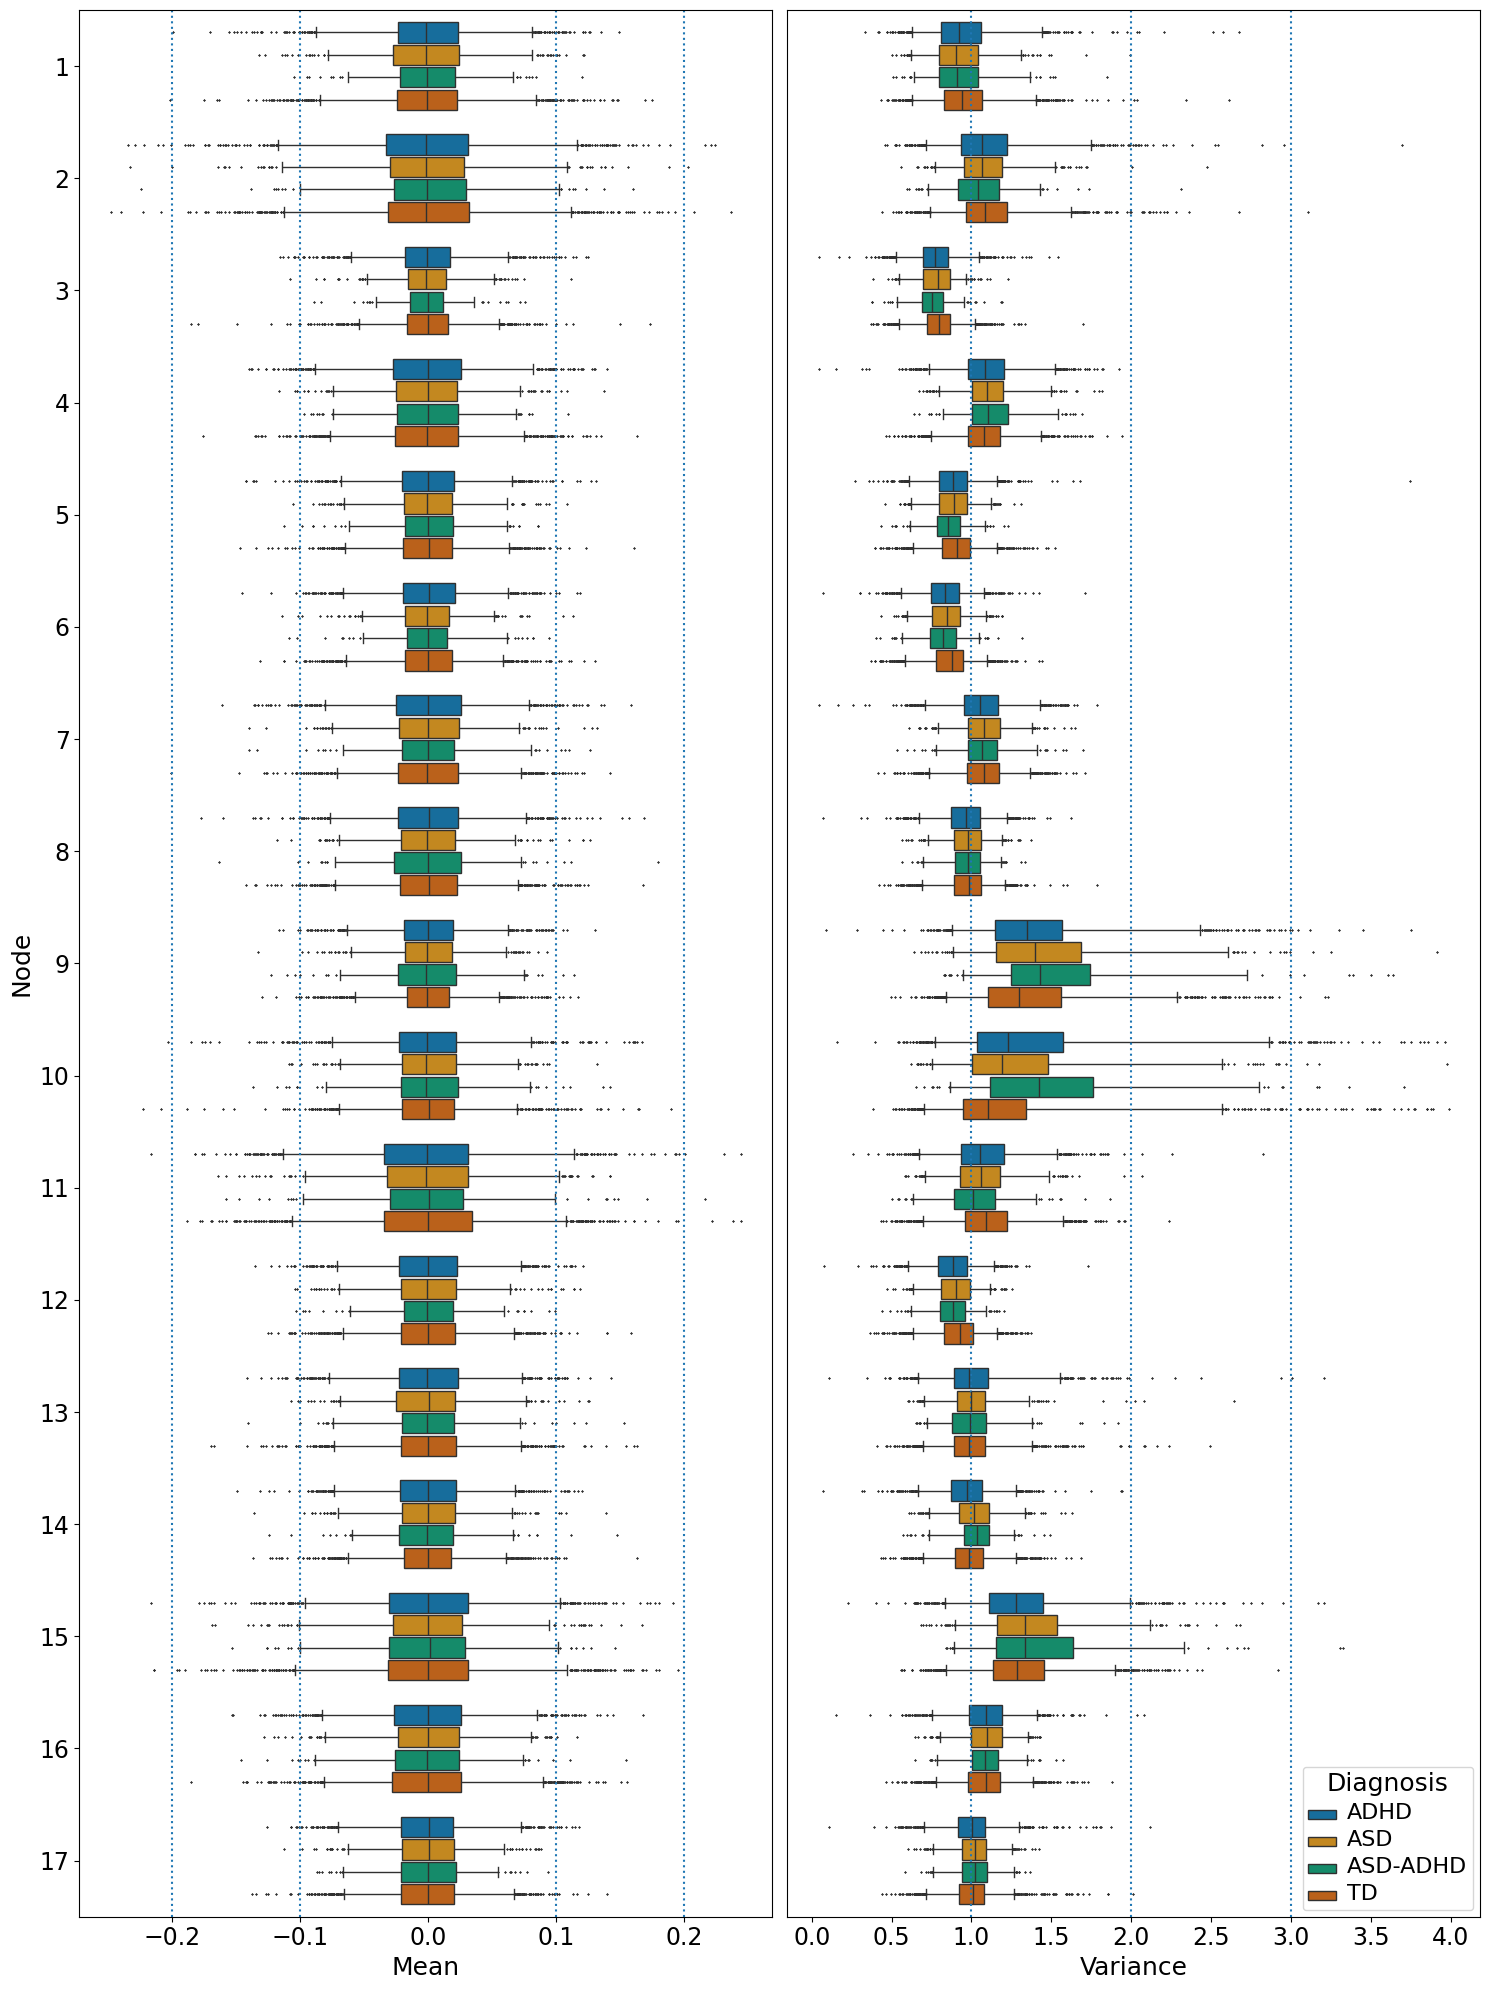

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(15, 20))

mean_features = node_features[['Diagnosis', 'Node']+[i for i in node_features.columns if 'mean' in i]].melt(['Diagnosis', 'Node'])
removed_ = mean_features[(-0.25>mean_features['value']) | (mean_features['value']>0.25)]
print('Mean removed', removed_.shape)
mean_features = mean_features[(-0.25<=mean_features['value']) & (mean_features['value']<=0.25)]

sns.boxplot(
    mean_features, 
    x="value", 
    y="Node", 
    hue="Diagnosis",
    whis=[2.5, 97.5],
    flierprops={"marker": "x"},
    fliersize = 1, 
    width=0.8,
    legend= False,
    palette = 'colorblind',
    hue_order= ['ADHD', 'ASD', 'ASD-ADHD', 'TD'],
    gap=0.1,
    order = [str(i+1) for i in range(17)],
    ax=ax[0]
)
ax[0].set_ylabel('Node', fontsize = 18)
ax[0].set_xlabel('Mean', fontsize = 18)
ax[0].tick_params(axis='both', labelsize=17)

for i in [-0.2, -0.1, 0.1, 0.2]:
    ax[0].axvline(x = i ,      # Line on x = 2
                ymin = 0, # Bottom of the plot
                ymax = 1,
                linestyle = 'dotted') # Top of the plot

var_features = node_features[['Diagnosis', 'Node']+[i for i in node_features.columns if 'var' in i]].melt(['Diagnosis', 'Node'])
removed_ = var_features[var_features['value']>=4]
print('Variance removed', removed_.shape)
var_features = var_features[var_features['value']<4]
#var_features['value'] = var_features['value'].apply(lambda x: sqrt(x))
sns.boxplot(
    var_features, 
    x="value", 
    y="Node", 
    hue="Diagnosis",
    whis=[2.5, 97.5],
    flierprops={"marker": "x"},
    fliersize = 1, 
    width=0.8,
    palette = 'colorblind',
    hue_order= ['ADHD', 'ASD', 'ASD-ADHD', 'TD'],
    gap=0.1,
    order = [str(i+1) for i in range(17)],
    ax=ax[1]
)

ax[1].get_yaxis().set_visible(False)
ax[1].set_xlabel('Variance', fontsize = 18)
ax[1].tick_params(axis='both', labelsize=17)

leg = ax[1].get_legend()
leg.set_title("Diagnosis", prop={'size': 18})
for text in leg.get_texts():
    text.set_fontsize(16)

for i in [1, 2, 3]:
    ax[1].axvline(x = i ,      # Line on x = 2
                ymin = 0, # Bottom of the plot
                ymax = 1,
                linestyle = 'dotted') # Top of the plot

plt.tight_layout()
plt.savefig("notebooks/pics/17 ROIs/Node_feature_boxplot.svg", dpi = 300)
plt.show()


### PCA Plot

#### PCA pr. node

Node 1: [0.5171997 0.0984132], (n=660)
Node 2: [0.41517668 0.13981085], (n=660)
Node 3: [0.3903489  0.14994047], (n=660)
Node 4: [0.39715489 0.13561436], (n=660)
Node 5: [0.28590372 0.17245025], (n=660)
Node 6: [0.36045045 0.15483207], (n=660)
Node 7: [0.39087858 0.1351752 ], (n=660)
Node 8: [0.2391851  0.15475266], (n=660)
Node 9: [0.6808018  0.06871362], (n=660)
Node 10: [0.71583833 0.05827892], (n=660)
Node 11: [0.37424586 0.12749403], (n=660)
Node 12: [0.31963141 0.15072766], (n=660)
Node 13: [0.39432068 0.11977094], (n=660)
Node 14: [0.35510666 0.15534459], (n=660)
Node 15: [0.53117829 0.10148898], (n=660)
Node 16: [0.21289645 0.16899966], (n=660)
Node 17: [0.25714101 0.16190056], (n=660)


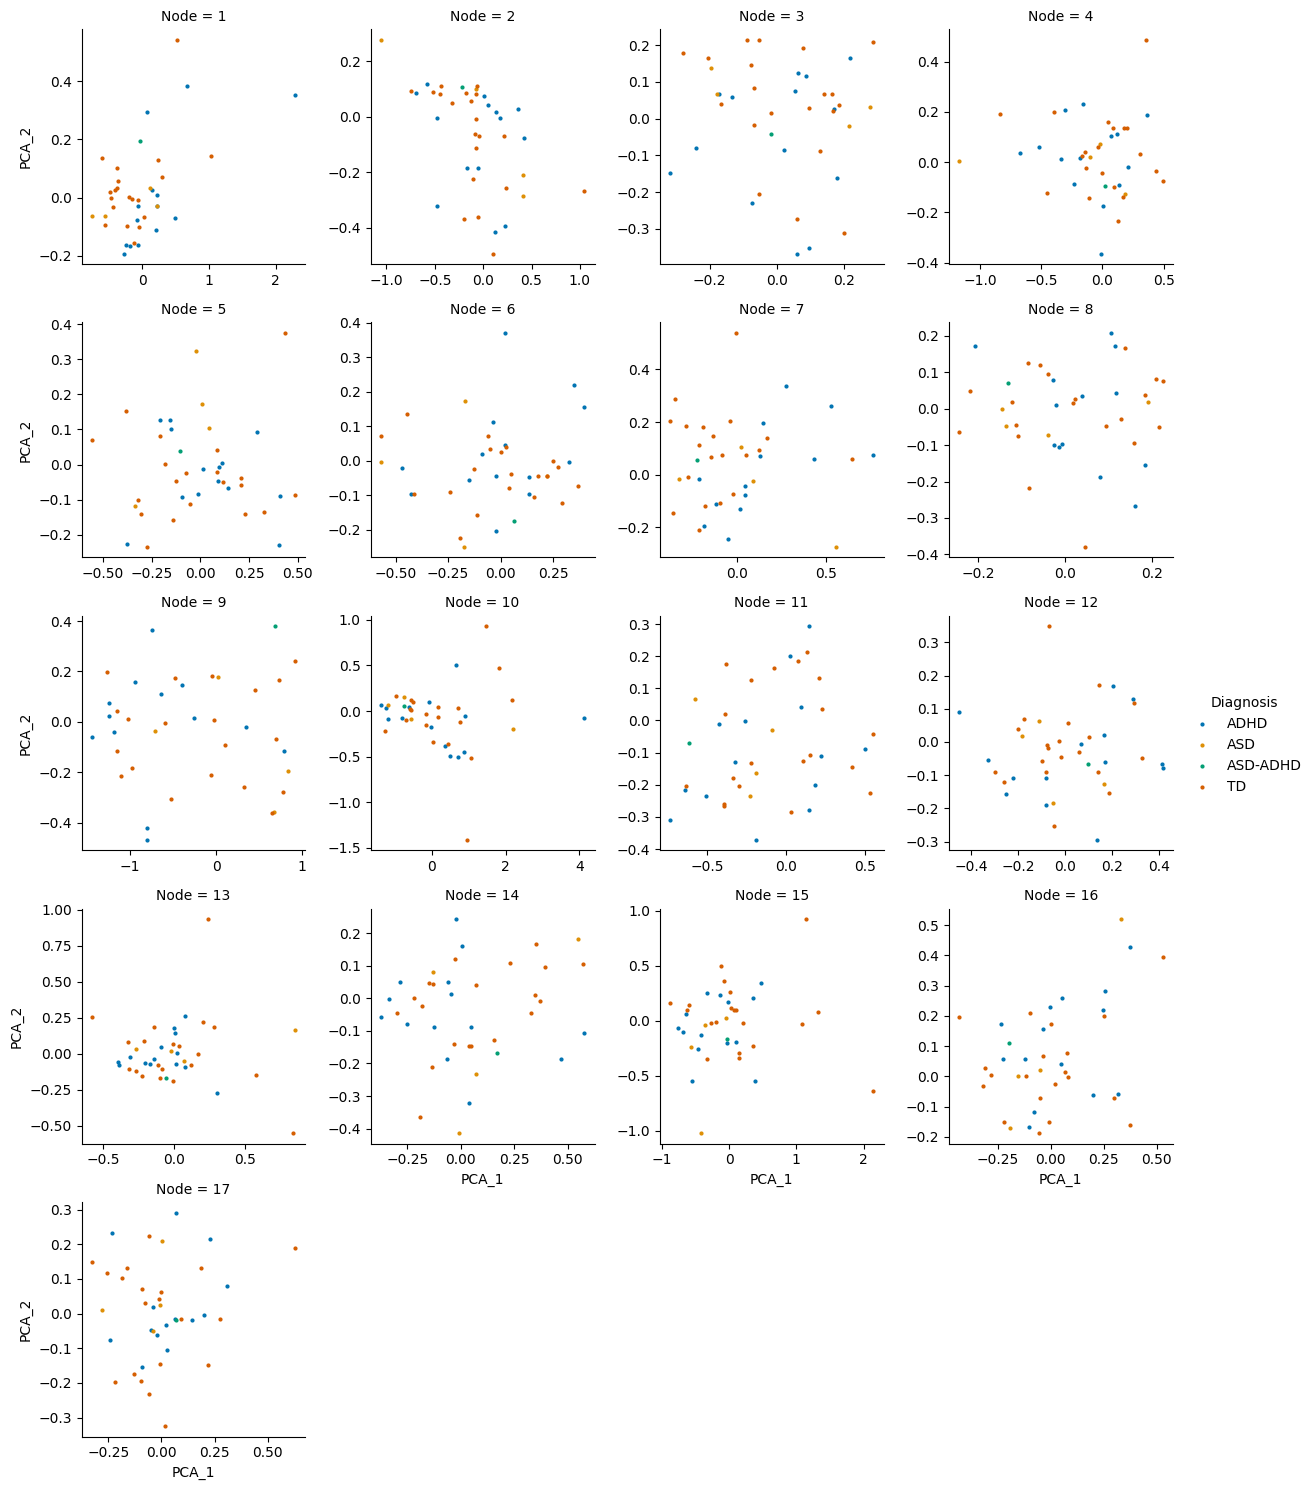

In [11]:
pca_data = []
for i in range(17):
    node_data = node_features[node_features['Node'] == str(i+1)]
    pca = PCA(n_components=2)
    pca.fit(node_data[features])
    print(f'Node {i+1}: {pca.explained_variance_ratio_}, (n={len(node_data)})')
    temp_pca_data = pd.DataFrame(pca.transform(node_data[features]), columns= ['PCA_1', "PCA_2"])
    temp_pca_data[['Node', 'Diagnosis']] = node_data[['Node', 'Diagnosis']]
    pca_data.append(temp_pca_data)

pca_data = pd.concat(pca_data)

sns.lmplot(
    data=pca_data, 
    x="PCA_1", 
    y="PCA_2", 
    col="Node", 
    hue="Diagnosis",
    palette = 'colorblind',
    hue_order = ['ADHD', 'ASD', 'ASD-ADHD', 'TD'],
    col_wrap=4, 
    fit_reg = False,
    height=3, 
    scatter_kws={"s": 4, "alpha": 1}, 
    facet_kws={"sharex": False, "sharey": False},
)

#### PCA for all nodes

[0.69610855 0.06421324]


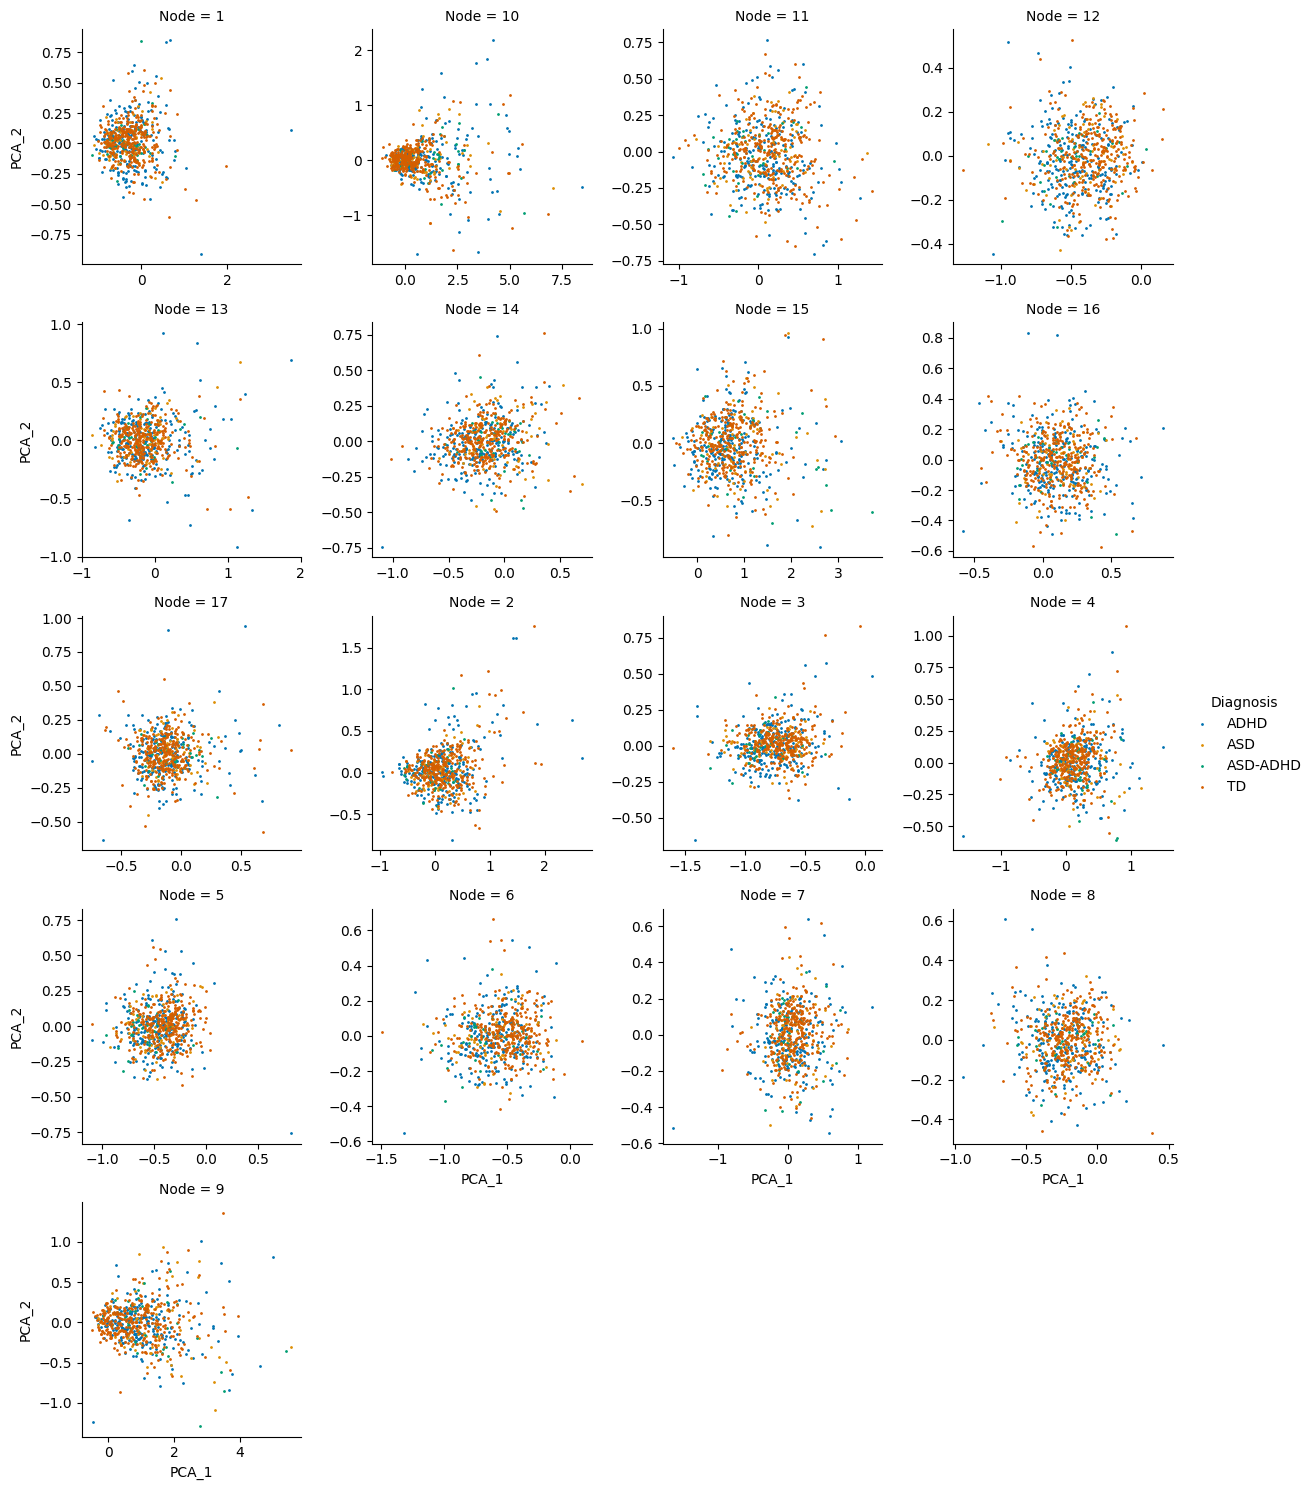

In [12]:
pca = PCA(n_components=2)
pca.fit(node_features[features])
pca_data = pd.DataFrame(pca.transform(node_features[features]), columns= ['PCA_1', "PCA_2"])
pca_data[['Node', 'Diagnosis']] = node_features[['Node', 'Diagnosis']]
print(pca.explained_variance_ratio_)
sns.lmplot(
    data=pca_data, 
    x="PCA_1", 
    y="PCA_2", 
    col="Node", 
    hue="Diagnosis",
    palette = 'colorblind',
    hue_order = ['ADHD', 'ASD', 'ASD-ADHD', 'TD'],
    col_wrap=4, 
    fit_reg = False,
    height=3, 
    scatter_kws={"s": 1, "alpha": 1}, 
    facet_kws={"sharex": False, "sharey": False},
)

# Edge features

In [13]:
edge_features = []
network_nan = []
for key, value in network_dict.items():
    network = value['network']
    edge_pairs = []
    for u in range(17):
        u = str(u+1)
        for v in range(17):
            v = str(v+1)
            if u != v and [u, v] not in edge_pairs:
                e_data = {'u':u, 
                          'v':v, 
                          'Diagnosis': value['diagnosis']}                
                for e, weights in network.get_edge_data(u, v).items():
                    e_data[weights['feature_name']] = weights['feature_value']
                edge_features.append(e_data)
                edge_pairs.append([u, v])
edge_features = pd.DataFrame(edge_features)

In [14]:
for i in edge_features.Diagnosis.unique():
    count = edge_features[edge_features['Diagnosis'] == i].isna().sum().to_list()
    print(f'Diagnosis: {i}, NaN count: {count}')

Diagnosis: TD, NaN count: [0, 0, 0, 0, 0, 0, 0, 0, 0]
Diagnosis: ADHD, NaN count: [0, 0, 0, 0, 0, 0, 0, 0, 0]
Diagnosis: ASD, NaN count: [0, 0, 0, 0, 0, 0, 0, 0, 0]
Diagnosis: ASD-ADHD, NaN count: [0, 0, 0, 0, 0, 0, 0, 0, 0]


## Get degree distribution

In [15]:
def remove_edges(network_dict, threshold = None, absolute = False):
    less_e_network_dict = {}
    for key, value in network_dict.items():
        network = value['network'].copy()
        to_remove = []
        for e in network.edges:
            edge_feature = network[e[0]][e[1]][e[2]]['feature_value']
            
            if str(edge_feature) == 'nan':
                edge_feature = 0
                network[e[0]][e[1]][e[2]]['feature_value'] = edge_feature
            
            if absolute:
                edge_feature = abs(edge_feature)
                network[e[0]][e[1]][e[2]]['feature_value'] = edge_feature
            
            if threshold != None:
                if edge_feature < threshold:
                    to_remove.append(e)
        
        for i in to_remove:
            network.remove_edge(*i)
        
        new_values = value.copy()
        new_values['network'] = network
        less_e_network_dict[key] = new_values
        
    return less_e_network_dict

In [16]:
def calculate_degree(network_dict):
    dia_degrees = []
    
    for key, value in network_dict.items():
        network = value['network'].copy()
        for n, d in dict(network.degree()).items():
            dia_degrees.append({'Diagnosis': value['diagnosis'],
                                'Node': n,
                                'Degree': d})
        #dia_degrees[value['diagnosis']] = dia_degrees[value['diagnosis']] + sorted((d for n, d in network.degree()), reverse=True)    
    
    # dataframes = []
    # for key, value in dia_degrees.items():
    #     temp = pd.DataFrame(value, columns= ['Degree'])
    #     temp['Diagnosis'] = key
    #     dataframes.append(temp)
    
    data = pd.DataFrame(dia_degrees)
    
    return data

def calculate_betweenness(network, diagnosis, use_weights):
    #calculate betweenness centrality
    bw_node= []

    if use_weights:
        betweenness = nx.betweenness_centrality(network, 
                                        k=None, 
                                        normalized=True, 
                                        weight='feature_value', 
                                        endpoints=False, 
                                        seed=42)
    else:
        betweenness = nx.betweenness_centrality(network, 
                                        k=None, 
                                        normalized=True, 
                                        weight=None, 
                                        endpoints=False, 
                                        seed=42)
    for n, bwn in betweenness.items():
        bw_node.append([diagnosis, n, bwn, use_weights])

    return pd.DataFrame(bw_node, columns = ['Diagnosis', 'Node', 'Betweenness', 'Weights'])

def calculate_iso_nodes(network):
    iso = nx.number_of_isolates(network)
    return iso

def calculate_edge_stats(network, edges_start):
    return (network.number_of_edges()/edges_start)*100


def calculate_network_stats(network_dict, threshold = None, absolute = False):
    #Remove the edges given the inputs
    temp_network_dict = remove_edges(network_dict, threshold = threshold, absolute = absolute)

    #Calculate the degrees (pd.Dataframe)
    degrees = calculate_degree(temp_network_dict)
    degrees['Threshold'] = threshold
    degrees['Absolute'] = absolute

    #Calculate the betweenness centrality
    betweenness = []
    for key, value in temp_network_dict.items():
        betweenness.append(calculate_betweenness(value['network'], value['diagnosis'], use_weights = True))
        betweenness.append(calculate_betweenness(value['network'], value['diagnosis'], use_weights = False))
    betweenness = pd.concat(betweenness)
    betweenness['Threshold'] = threshold
    betweenness['Absolute'] = absolute

    #calculate isolated nodes
    iso_node = []
    iso_graph = []

    for key, value in temp_network_dict.items():
        iso_graph.append({'Diagnosis': value['diagnosis'],
                          '#iso': nx.number_of_isolates(value['network'])})
        for n in range(17):
            iso_node.append({'Diagnosis': value['diagnosis'],
                        'Node': str(n+1),
                        '#iso': nx.is_isolate(value['network'], str(n+1))})
    iso_node = pd.DataFrame(iso_node)
    iso_node['Threshold'] = threshold
    iso_node['Absolute'] = absolute

    iso_graph = pd.DataFrame(iso_graph)
    iso_graph['Threshold'] = threshold
    iso_graph['Absolute'] = absolute

    return degrees, betweenness, iso_node, iso_graph


In [17]:
degree_dict = {} #key = thres, absolute, value = pd.dataframe
betweenness_dict = {} #key = thres, absolute, value = pd.dataframe
iso_node_dict = {} #key = thres, absolute, value = pd.dataframe
iso_graph_dict = {} #key = thres, absolute, value = pd.dataframe

for t in [i/10 for i in range(1, 10)]:
    print(t)
    degrees, betweenness, iso_node, iso_graph = calculate_network_stats(network_dict.copy(), 
                                                                        threshold = t, 
                                                                        absolute = True)
    degree_dict[t,True] = degrees
    betweenness_dict[t,True] = betweenness
    iso_node_dict[t,True] = iso_node
    iso_graph_dict[t,True] = iso_graph
    
    degrees, betweenness, iso_node, iso_graph = calculate_network_stats(network_dict.copy(), 
                                                                        threshold = t, 
                                                                        absolute = False)
    degree_dict[t,False] = degrees
    betweenness_dict[t,False] = betweenness
    iso_node_dict[t,False] = iso_node
    iso_graph_dict[t,False] = iso_graph

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


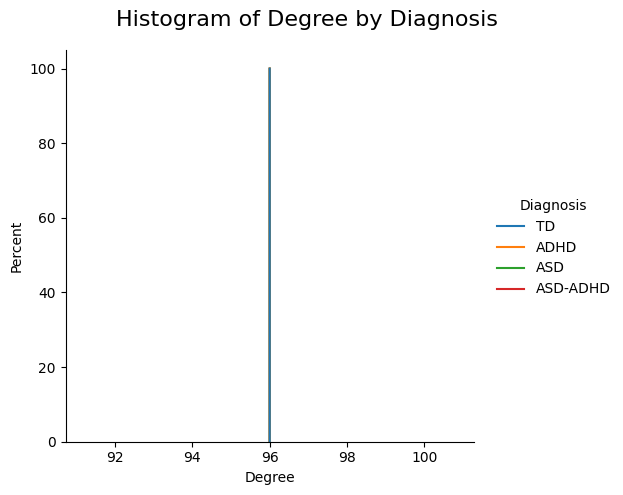

In [18]:
degree_data = calculate_degree(network_dict.copy())
g = sns.displot(degree_data, x = 'Degree', hue='Diagnosis', kind="ecdf", stat="percent")
g.fig.suptitle("Histogram of Degree by Diagnosis", fontsize=16)
g.fig.subplots_adjust(top=0.9)

#### Degree distributions (No Absolute values)

In [19]:
def calculate_prob_degree(network_dict, thres, d, absolute):
    temp_network_dict = remove_edges(network_dict, threshold = thres, absolute = absolute)
    temp_degree_data = calculate_degree(temp_network_dict)
    for dia in temp_degree_data['Diagnosis'].unique():
        group_degree = temp_degree_data[temp_degree_data['Diagnosis'] == dia].sort_values('Degree')['Degree'].to_list()
        above = [i for i in group_degree if i>=d]
        print(f"{dia}, threshold {thres}, P(k>={d}): {len(above)/len(group_degree)}, min: {min(group_degree)}, max: {max(group_degree)}")

In [20]:
calculate_prob_degree(network_dict.copy(), 0.1, 48, False)
calculate_prob_degree(network_dict.copy(), 0.9, 48, False)

TD, threshold 0.1, P(k>=48): 0.962322183775471, min: 20, max: 79
ADHD, threshold 0.1, P(k>=48): 0.964259121370067, min: 19, max: 88
ASD, threshold 0.1, P(k>=48): 0.9455882352941176, min: 23, max: 80
ASD-ADHD, threshold 0.1, P(k>=48): 0.958664546899841, min: 29, max: 78
TD, threshold 0.9, P(k>=48): 0.08342945021145713, min: 3, max: 60
ADHD, threshold 0.9, P(k>=48): 0.08289898237776124, min: 5, max: 66
ASD, threshold 0.9, P(k>=48): 0.06985294117647059, min: 6, max: 58
ASD-ADHD, threshold 0.9, P(k>=48): 0.09220985691573927, min: 8, max: 58


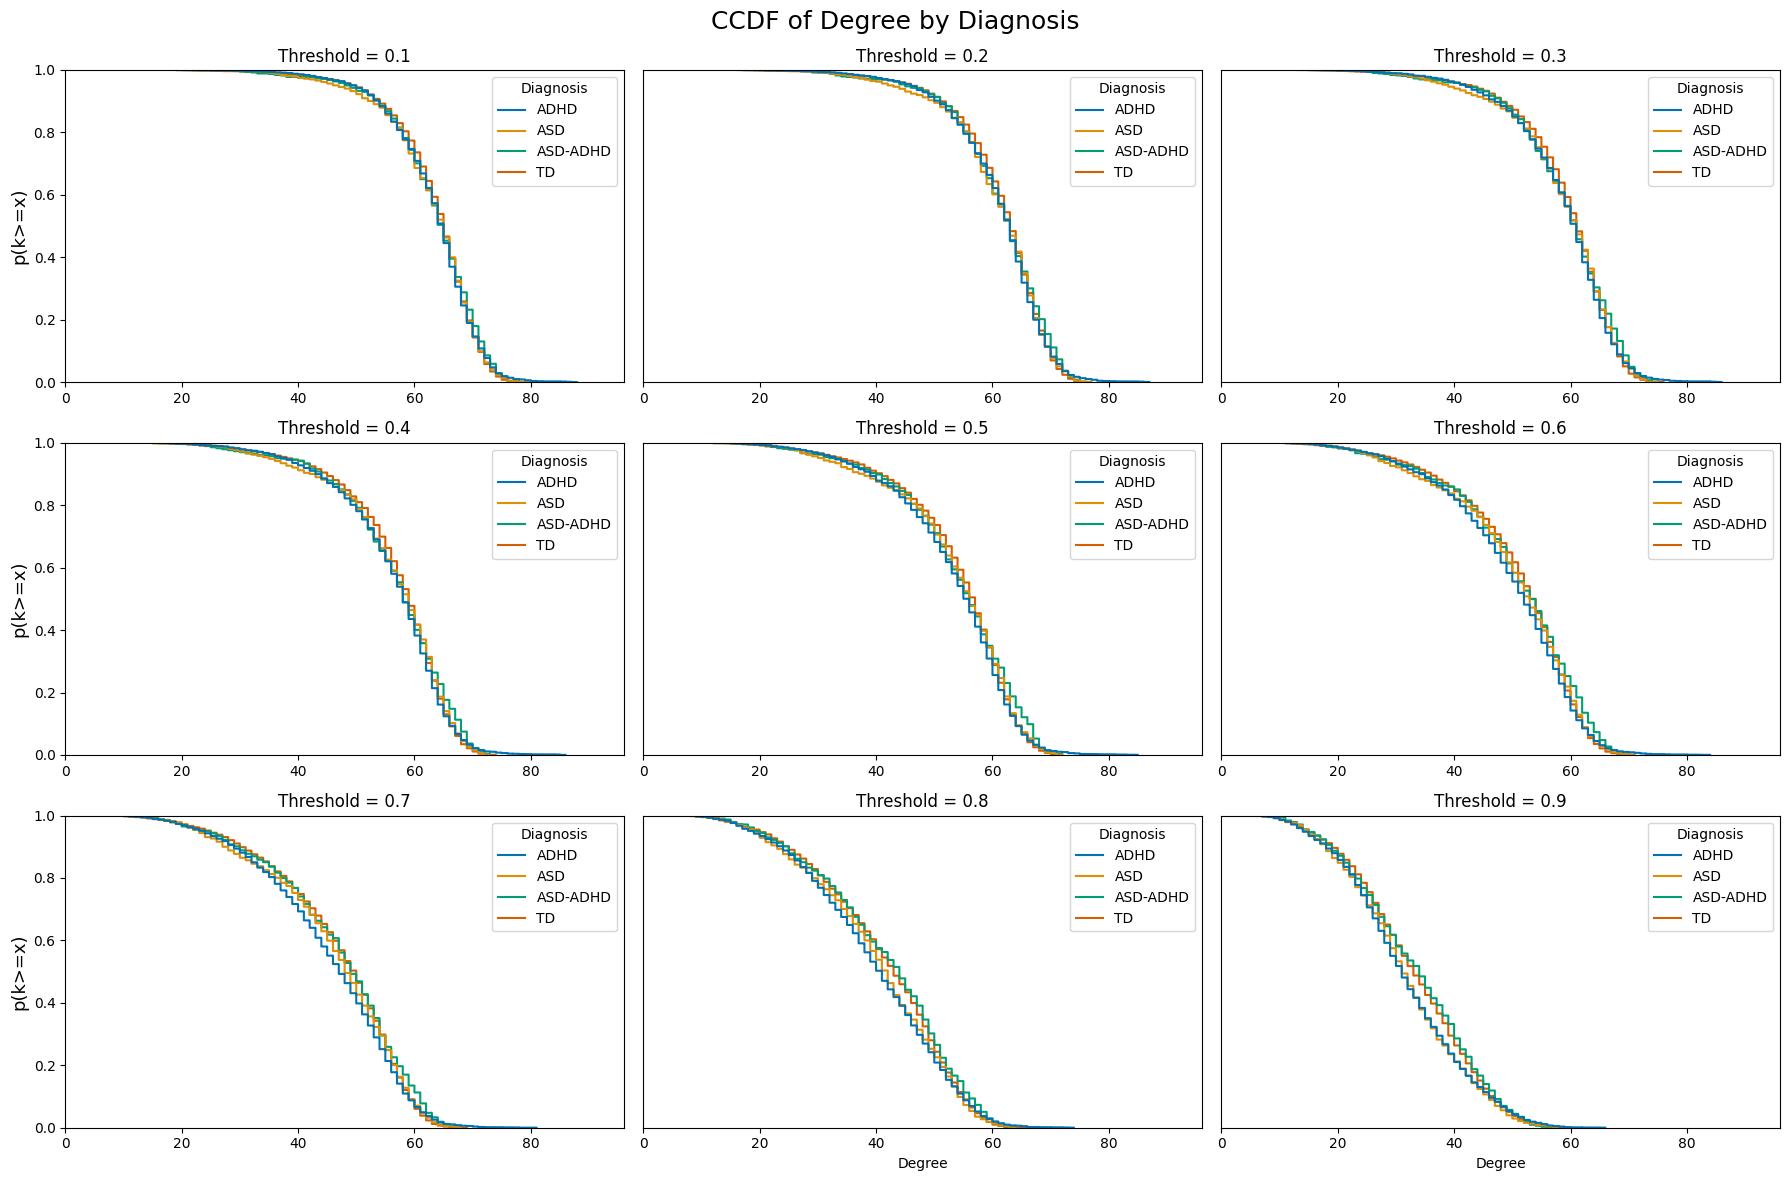

In [21]:
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

thresholds = [i/10 for i in range(1, 10)] 

for i, (ax, t) in enumerate(zip(axes, thresholds)):
    degree_data = degree_dict[t, False]
    sns.ecdfplot(data=degree_data, 
                 x='Degree', 
                 hue='Diagnosis',
                 palette = 'colorblind',
                 hue_order= ['ADHD', 'ASD', 'ASD-ADHD', 'TD'], 
                 ax=ax,
                 complementary=True)
    ax.set_title(f'Threshold = {t:.1f}')
    ax.set_xlim(0, 96)
    if i%3 != 0:
        ax.get_yaxis().set_visible(False)
    if i%3 == 0:
        ax.set_ylabel('p(k>=x)', fontsize = 13)
    if i <= 6:
        ax.set_xlabel('')

# Set a common title
fig.suptitle("CCDF of Degree by Diagnosis", fontsize=18)

# Adjust layout
plt.tight_layout()
fig.subplots_adjust(top=0.93)

plt.show()

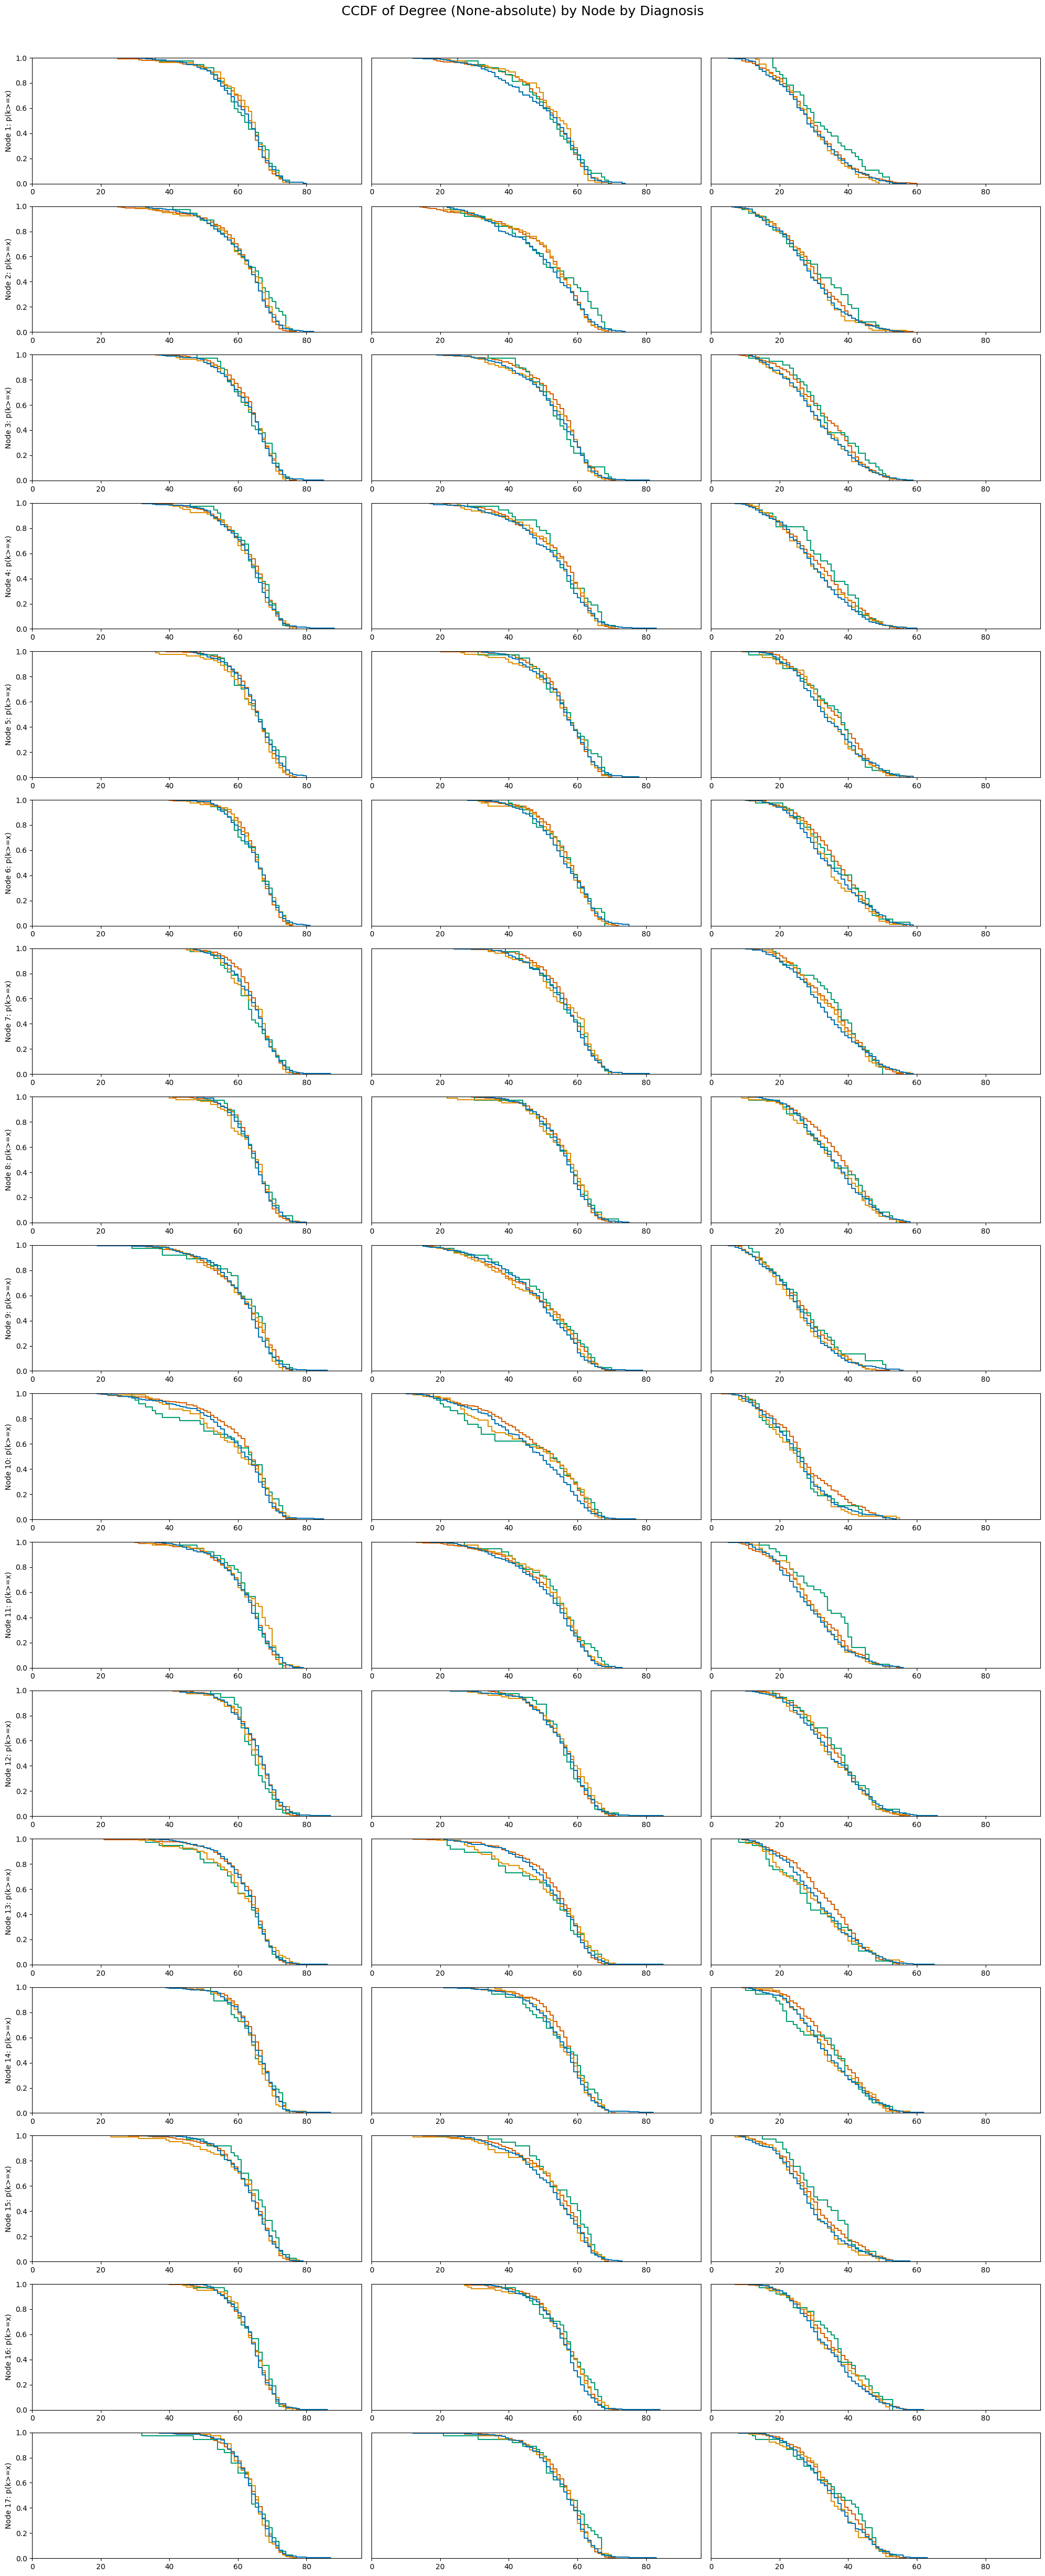

In [22]:
temp_degree = [value for key, value in degree_dict.items()]
temp_degree = pd.concat(temp_degree)
temp_degree = temp_degree[temp_degree['Absolute'] != True]
temp_degree['Node'] = temp_degree['Node'].apply(lambda x: int(x))

fig, axes = plt.subplots(17, 3, figsize=(20, 50))
axes = axes.flatten()

t = [0.1, 0.5, 0.9]

for i in range(0, 51, 3):
    for x in range(3):
        sns.ecdfplot(data=temp_degree[(temp_degree['Node']==(i/3)+1)& (temp_degree['Threshold']==t[x])], 
                    x='Degree', 
                    hue='Diagnosis',
                    palette = 'colorblind',
                    hue_order= ['ADHD', 'ASD', 'ASD-ADHD', 'TD'], 
                    ax=axes[i+x],
                    legend = False,
                    complementary=True)
        axes[i+x].set_xlim(0, 96)
    
        if (i+x)%3 != 0:
            axes[i+x].get_yaxis().set_visible(False)
        if (i+x)%3 == 0:
            axes[i+x].set_ylabel(f'Node {int((i/3)+1)}: p(k>=x)')
        
        axes[i+x].set_xlabel('')

fig.suptitle("CCDF of Degree (None-absolute) by Node by Diagnosis", fontsize=18)
# Adjust layout
plt.tight_layout()
fig.subplots_adjust(top=0.96)

#### Degree distributions (Absolute values)

In [23]:
calculate_prob_degree(network_dict.copy(), 0.1, 48, True)
calculate_prob_degree(network_dict.copy(), 0.9, 48, True)

TD, threshold 0.1, P(k>=48): 1.0, min: 76, max: 96
ADHD, threshold 0.1, P(k>=48): 1.0, min: 77, max: 96
ASD, threshold 0.1, P(k>=48): 1.0, min: 79, max: 96
ASD-ADHD, threshold 0.1, P(k>=48): 1.0, min: 78, max: 96
TD, threshold 0.9, P(k>=48): 0.4482891195693964, min: 32, max: 70
ADHD, threshold 0.9, P(k>=48): 0.3854554480019856, min: 32, max: 71
ASD, threshold 0.9, P(k>=48): 0.3735294117647059, min: 32, max: 67
ASD-ADHD, threshold 0.9, P(k>=48): 0.47058823529411764, min: 33, max: 68


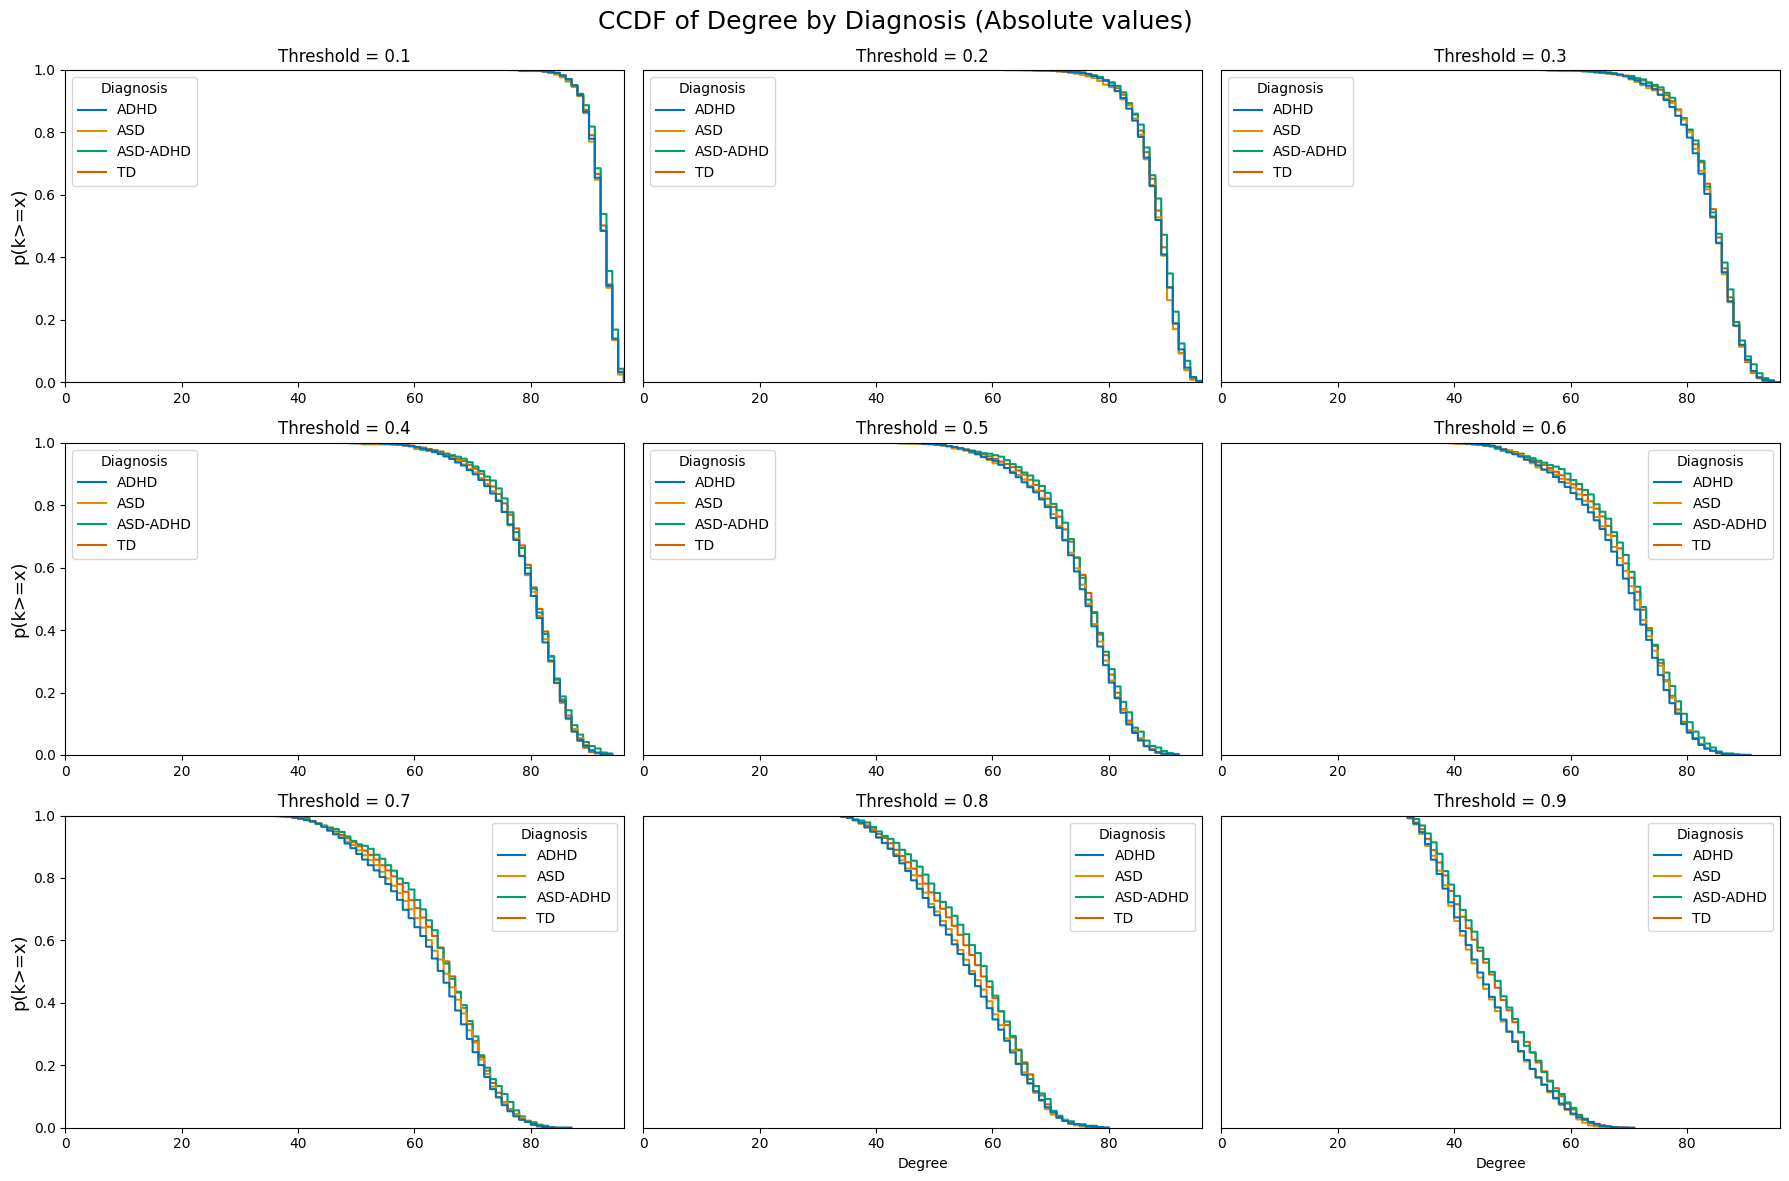

In [24]:
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

thresholds = [i/10 for i in range(1, 10)] 

for i, (ax, t) in enumerate(zip(axes, thresholds)):
    degree_data = degree_dict[t, True]
    sns.ecdfplot(data=degree_data, 
                 x='Degree', 
                 hue='Diagnosis',
                 palette = 'colorblind', 
                 hue_order= ['ADHD', 'ASD', 'ASD-ADHD', 'TD'],
                 ax=ax,
                 complementary=True)
    ax.set_title(f'Threshold = {t:.1f}')
    ax.set_xlim(0, 96)
    if i%3 != 0:
        ax.get_yaxis().set_visible(False)
    if i%3 == 0:
        ax.set_ylabel('p(k>=x)', fontsize = 13)
    if i <= 6:
        ax.set_xlabel('')

# Set a common title
fig.suptitle("CCDF of Degree by Diagnosis (Absolute values)", fontsize=18)

# Adjust layout
plt.tight_layout()
fig.subplots_adjust(top=0.93)

plt.show()

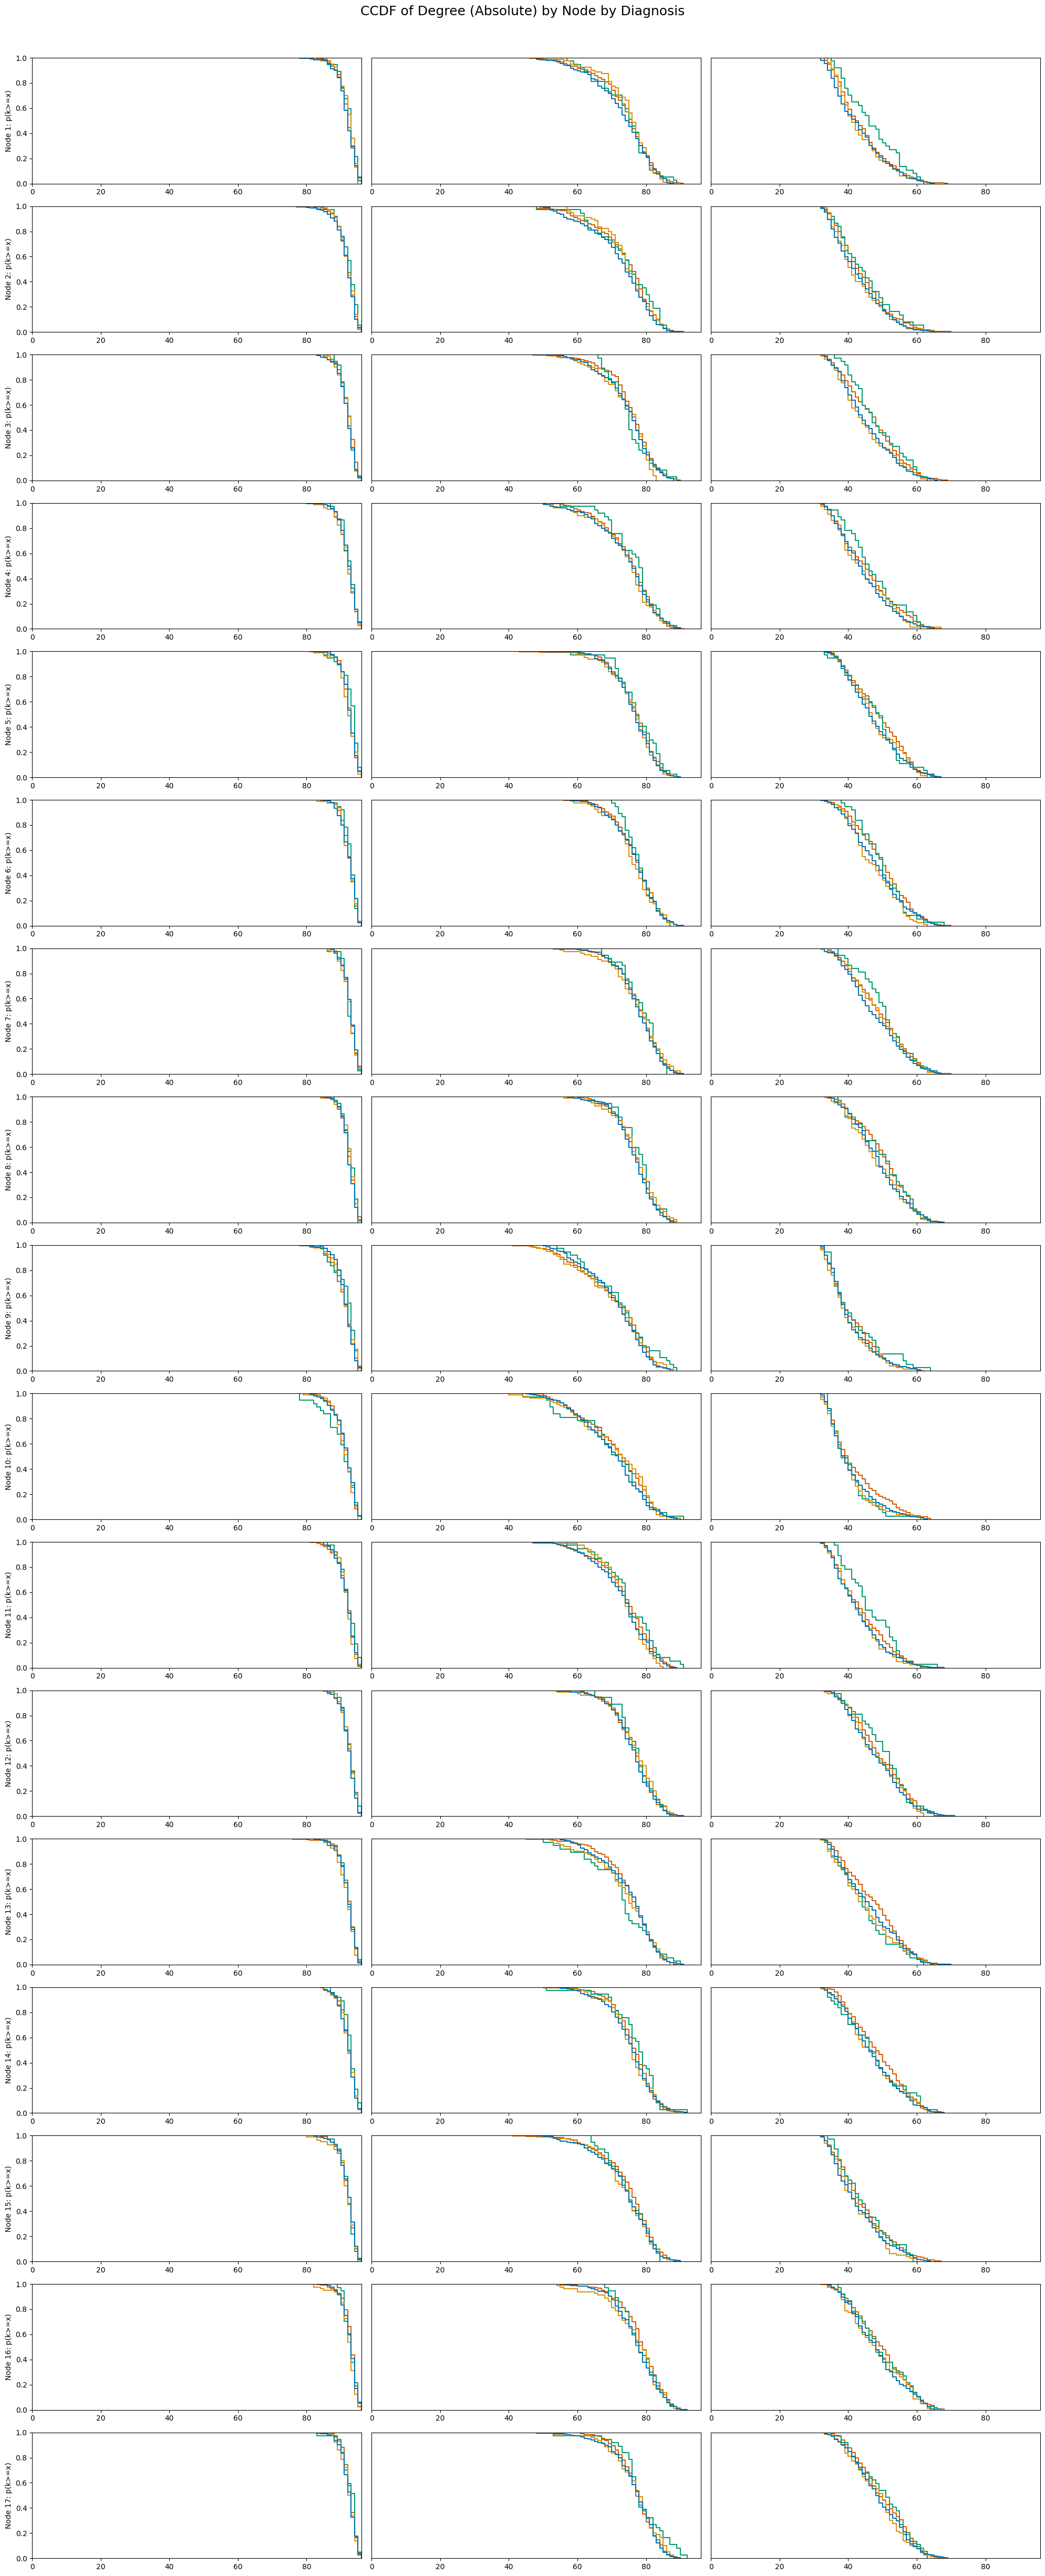

In [25]:
temp_degree = [value for key, value in degree_dict.items()]
temp_degree = pd.concat(temp_degree)
temp_degree = temp_degree[temp_degree['Absolute']]
temp_degree['Node'] = temp_degree['Node'].apply(lambda x: int(x))

fig, axes = plt.subplots(17, 3, figsize=(20, 50))
axes = axes.flatten()

t = [0.1, 0.5, 0.9]

for i in range(0, 51, 3):
    for x in range(3):
        sns.ecdfplot(data=temp_degree[(temp_degree['Node']==(i/3)+1)& (temp_degree['Threshold']==t[x])], 
                    x='Degree', 
                    hue='Diagnosis',
                    hue_order= ['ADHD', 'ASD', 'ASD-ADHD', 'TD'], 
                    palette = 'colorblind',
                    ax=axes[i+x],
                    legend = False,
                    complementary=True)
        axes[i+x].set_xlim(0, 96)
    
        if (i+x)%3 != 0:
            axes[i+x].get_yaxis().set_visible(False)
        if (i+x)%3 == 0:
            axes[i+x].set_ylabel(f'Node {int((i/3)+1)}: p(k>=x)')
        
        axes[i+x].set_xlabel('')

fig.suptitle("CCDF of Degree (Absolute) by Node by Diagnosis", fontsize=18)
# Adjust layout
plt.tight_layout()
fig.subplots_adjust(top=0.96)

### Percentage of edges kept

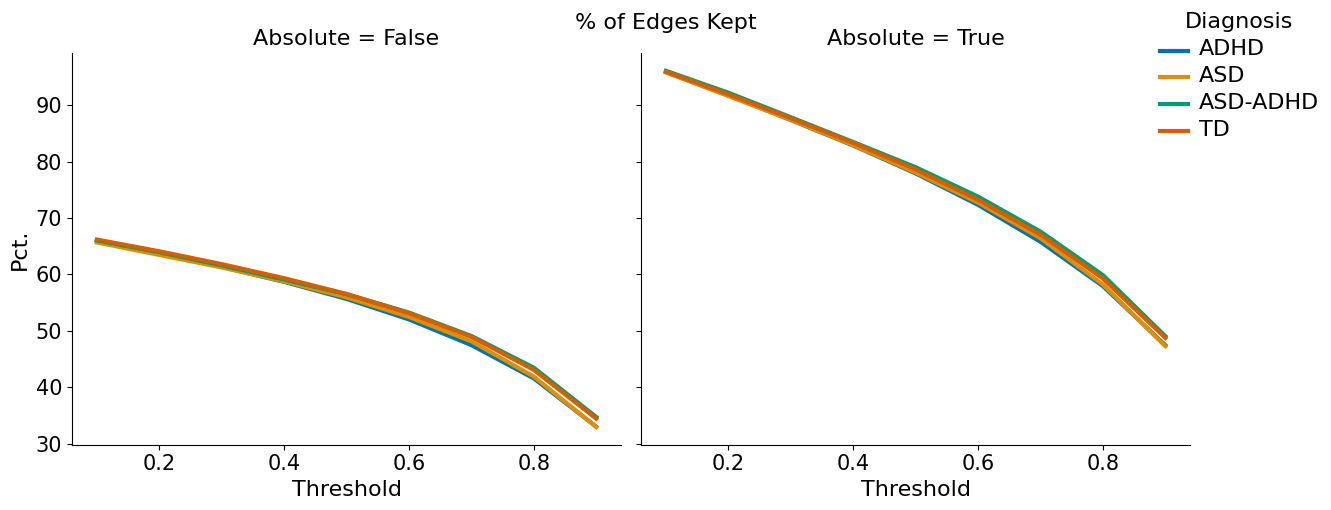

In [26]:
temp_degree = [value for key, value in degree_dict.items()]
temp_degree = pd.concat(temp_degree)
temp_degree['default'] = 96
temp_degree = temp_degree[['Diagnosis', 'Degree', 'Threshold', 'Absolute', 'default']]
temp_degree = temp_degree.groupby(['Diagnosis', 'Threshold', 'Absolute']).sum().reset_index()
temp_degree["Pct."] = (temp_degree['Degree']/temp_degree['default'])*100
temp_degree = temp_degree[['Diagnosis', 'Threshold', 'Absolute', 'Pct.']]
g = sns.relplot(
                temp_degree, 
                x="Threshold",
                y='Pct.',
                col = 'Absolute',
                palette = 'colorblind',
                hue = 'Diagnosis',
                hue_order = ['ADHD', 'ASD', 'ASD-ADHD', 'TD'],
                height=5,
                aspect = 1.2, 
                kind = 'line',
                linewidth=3
                )

# Increase tick label font size
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=16)
    ax.set_ylabel(ax.get_ylabel(), fontsize=16)
    ax.tick_params(axis='both', labelsize=15)
    ax.tick_params(axis='both', labelsize=15)
    ax.set_title(ax.get_title(), fontsize = 16)

#Legend
g._legend.set_title("Diagnosis", prop={'size': 16})
g._legend.set_loc("upper right")      # set location relative to that anchor
for text in g._legend.texts:
    text.set_fontsize(16)
    
g.fig.suptitle("% of Edges Kept", fontsize=16)
g.fig.subplots_adjust(top=0.9)
plt.savefig("notebooks/pics/17 ROIs/pct_of_edges_kept.svg", dpi = 300)
plt.show()


## Isolated nodes

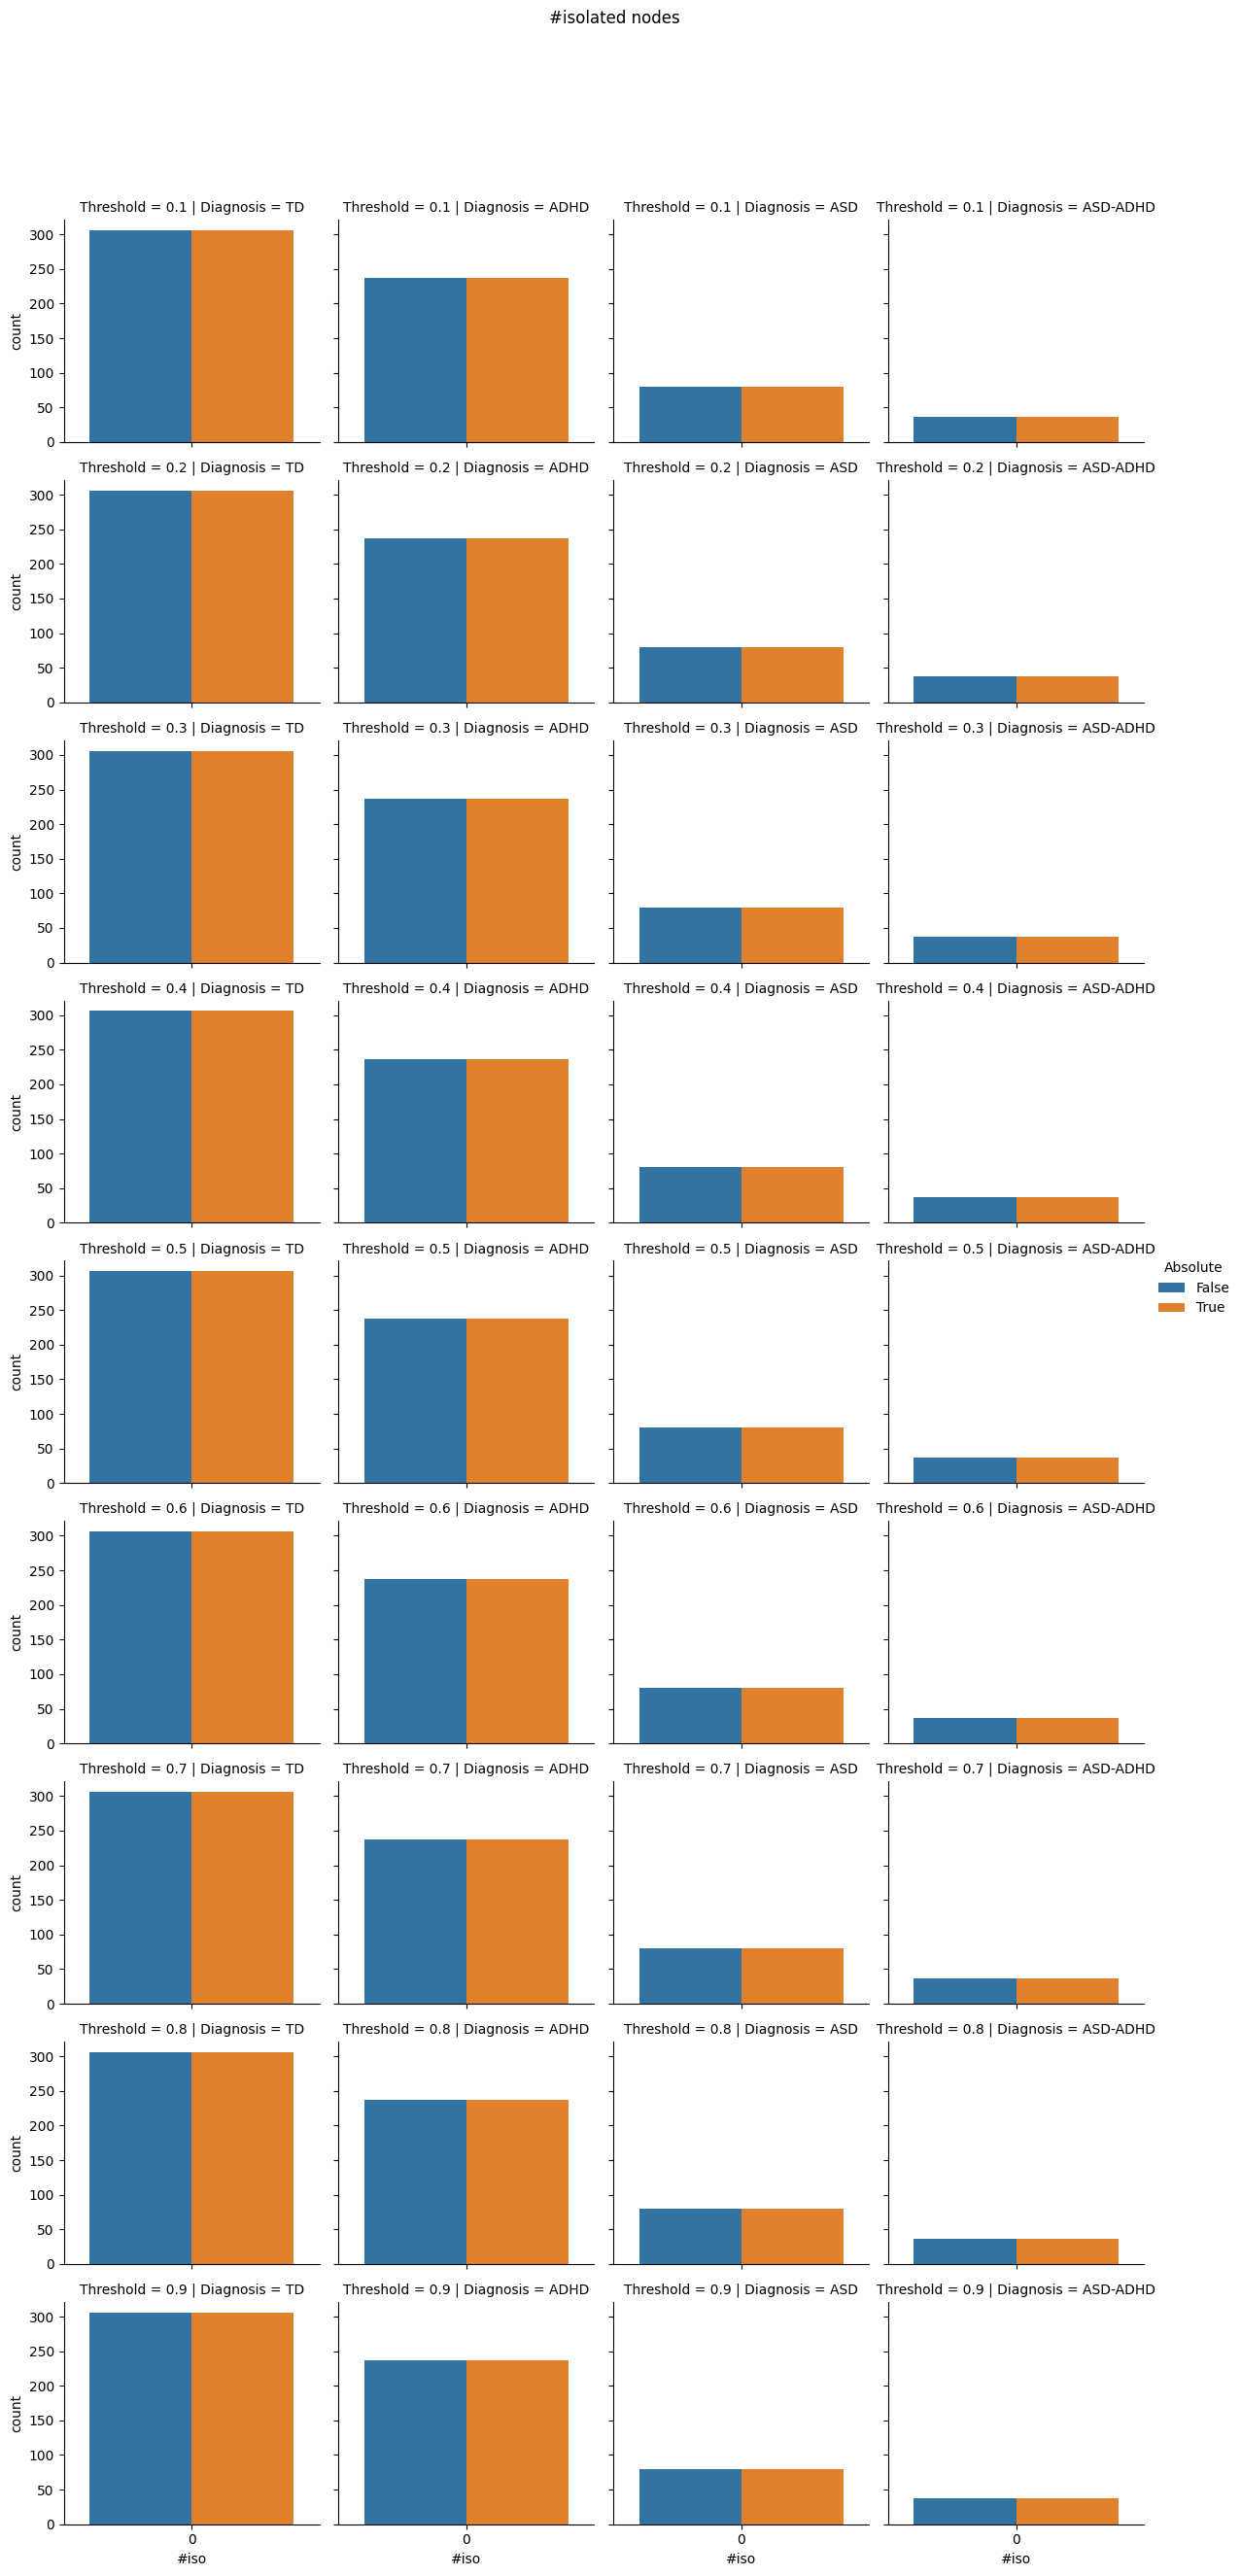

In [27]:
temp_iso = [value for key, value in iso_graph_dict.items()]
temp_iso = pd.concat(temp_iso)
p = sns.catplot(
    temp_iso[['Threshold', 'Diagnosis','Absolute', '#iso']], 
    x='#iso', 
    col="Diagnosis", 
    row='Threshold',
    hue = 'Absolute',
    height=3, 
    kind="count",
)
p.fig.suptitle(f'#isolated nodes')
p.fig.subplots_adjust(top=0.90)

## Betweenness centrality

### Total

In [28]:
temp_betweenness = [value for key, value in betweenness_dict.items()]

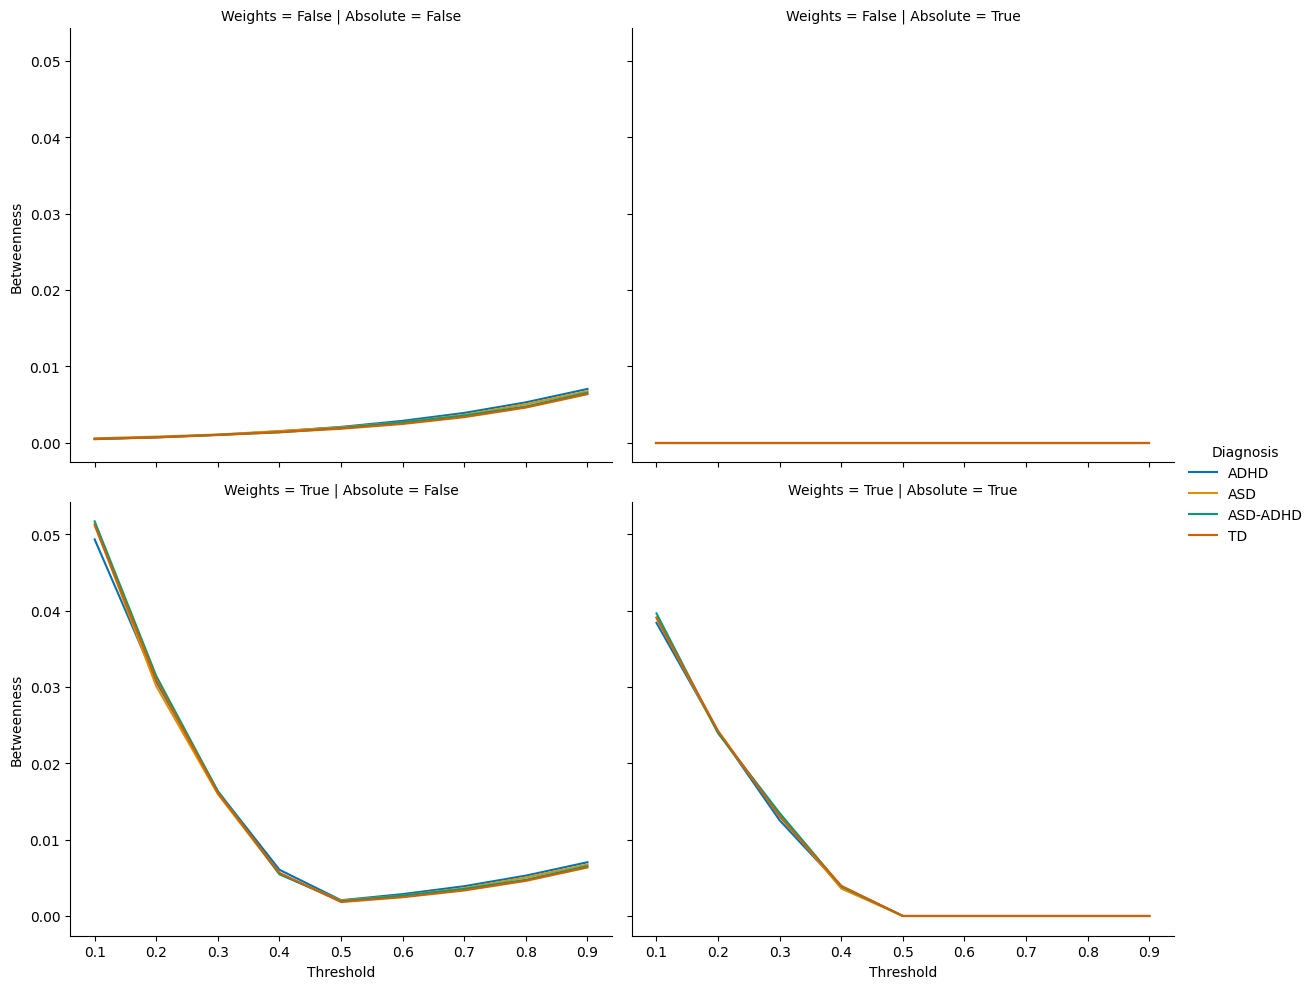

In [29]:
temp_betweenness = [value for key, value in betweenness_dict.items()]
temp_betweenness = pd.concat(temp_betweenness)

temp_betweenness = temp_betweenness[['Diagnosis', 'Absolute','Weights',
                                     'Threshold', 'Betweenness']].groupby(['Diagnosis',
                                                                            'Weights',
                                                                            'Absolute',
                                                                            'Threshold']).mean().reset_index()

sns.relplot(
    temp_betweenness, 
    x="Threshold",
    y='Betweenness',
    col = 'Absolute',
    row = 'Weights',
    hue = 'Diagnosis',
    palette = 'colorblind',
    hue_order = ['ADHD', 'ASD', 'ASD-ADHD', 'TD'],
    height=5,
    aspect = 1.2, 
    kind = 'line'
)

### Node-Level

In [30]:
temp_betweenness = [value for key, value in betweenness_dict.items()]
temp_betweenness = pd.concat(temp_betweenness)

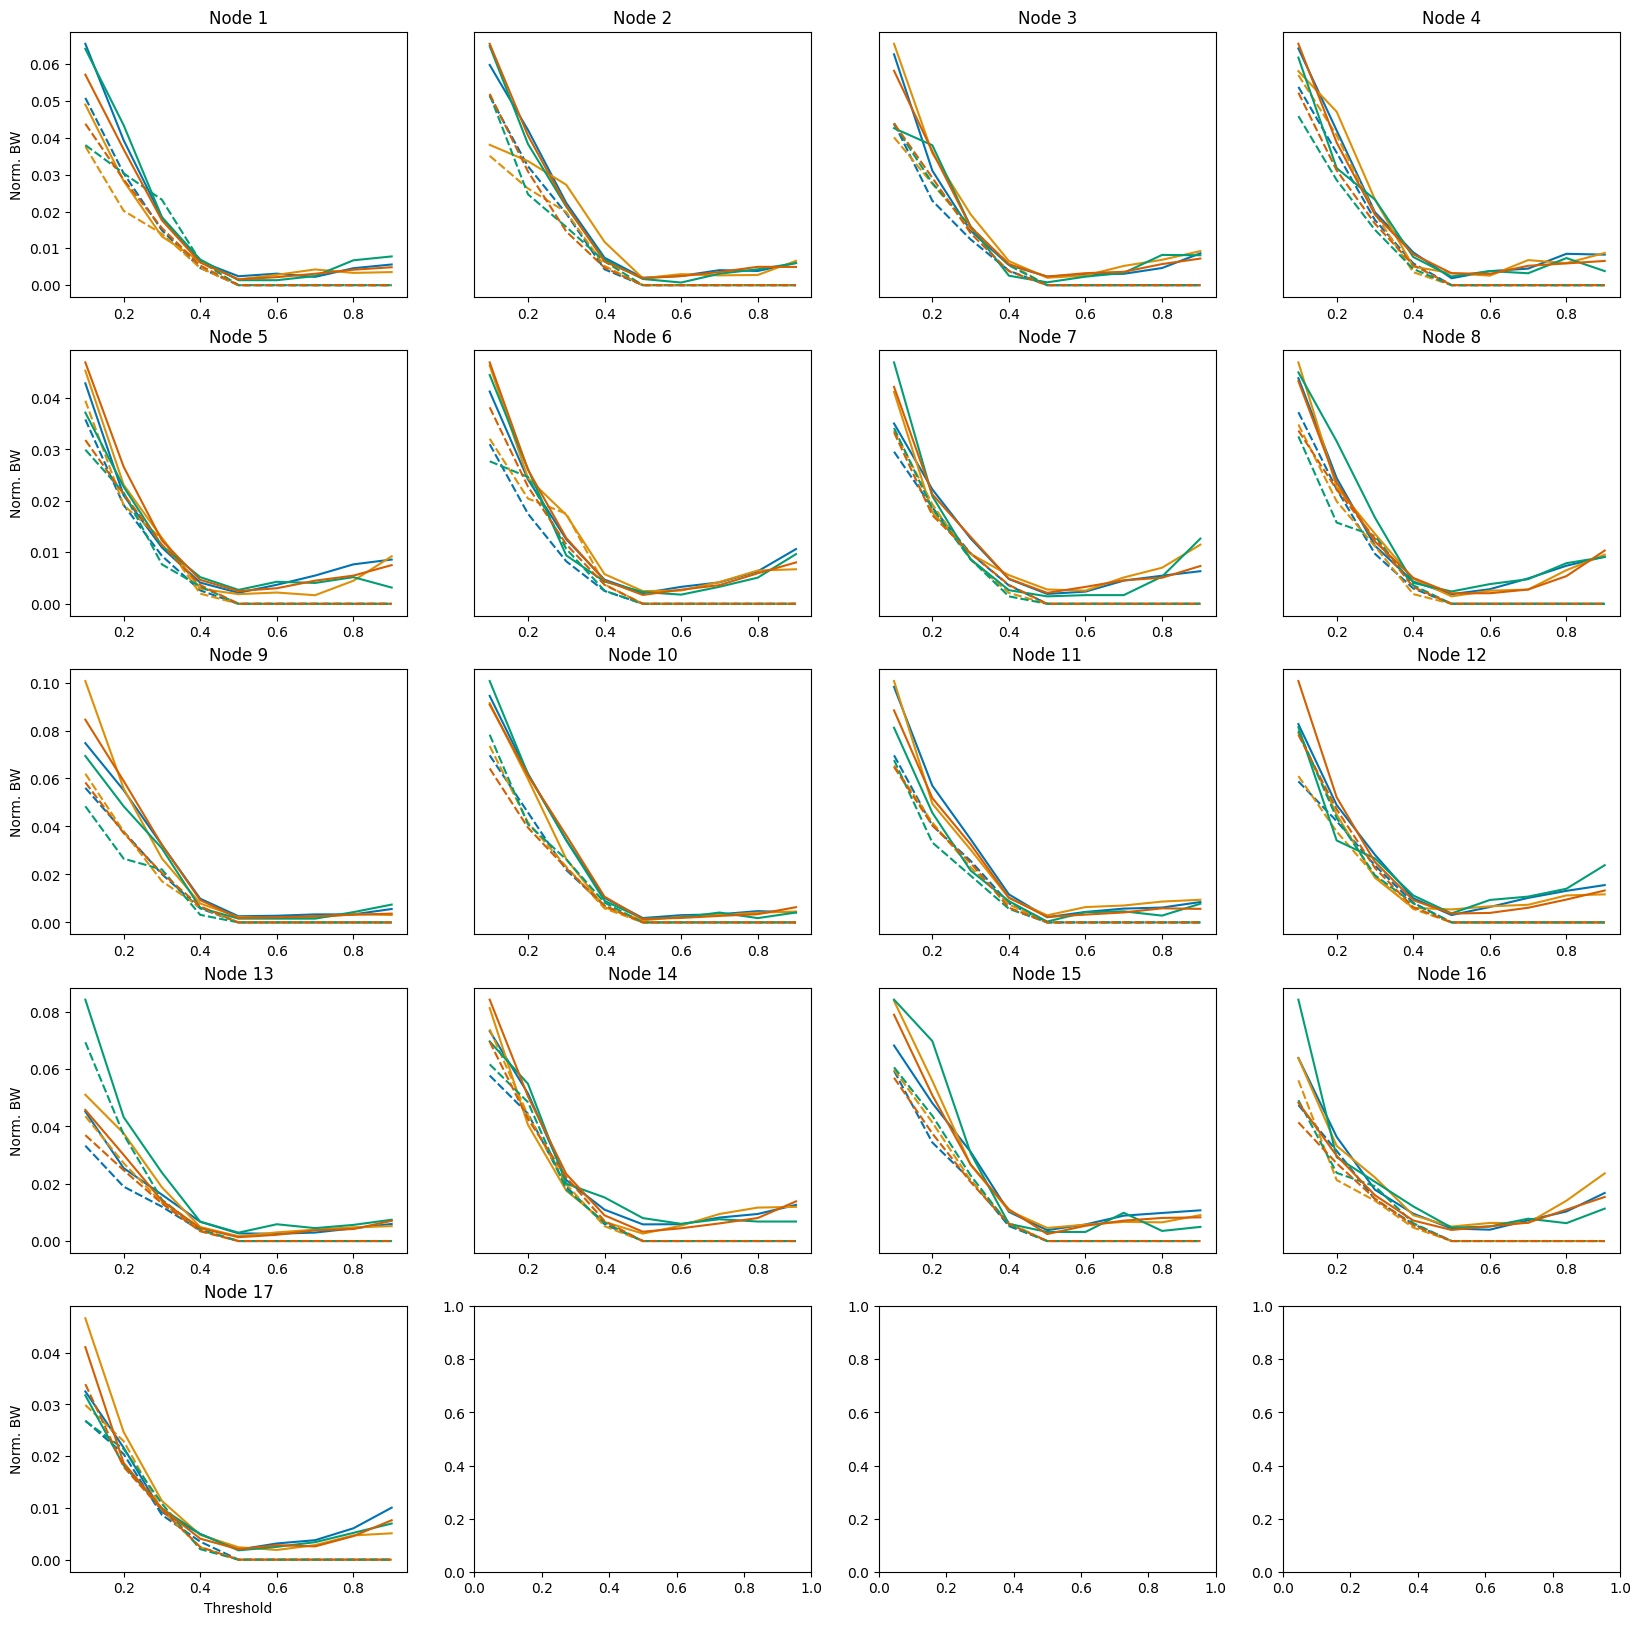

In [31]:
temp_betweenness = [value for key, value in betweenness_dict.items()]
temp_betweenness = pd.concat(temp_betweenness)
temp_betweenness = temp_betweenness[temp_betweenness["Weights"]]
temp_betweenness = temp_betweenness[['Diagnosis', 'Node','Absolute', 
                                     'Threshold', 'Betweenness']].groupby(['Diagnosis', 
                                                                            'Node', 
                                                                            'Absolute',
                                                                            'Threshold']).mean().reset_index()
temp_betweenness['Node'] = temp_betweenness['Node'].apply(lambda x: int(x))

fig, axes = plt.subplots(5, 4, figsize=(20, 20))
axes = axes.flatten()

for i in range(17):
    sns.lineplot(
                temp_betweenness[temp_betweenness['Node']==i+1], 
                x="Threshold",
                y='Betweenness',
                style = 'Absolute',
                hue = 'Diagnosis',
                palette = 'colorblind',
                hue_order = ['ADHD', 'ASD', 'ASD-ADHD', 'TD'],
                ax = axes[i],
                legend = False
            )
    axes[i].set_title(f'Node {i+1}')
    if i%4 != 0:
        axes[i].get_yaxis().set_visible(False)
    if i%4 == 0:
        axes[i].set_ylabel('Norm. BW')
    if i <= 15:
        axes[i].set_xlabel('')


# GAT Networks (Edge thresholds)

In [32]:
#Key = filename, value = {id: str, run: int, dataset: str, diagnosis: str, network: nx.graph}
network_gat_dict = {}

file_list = [f for f in os.listdir('data.nosync/networks_multi_gat/') if '.gml' in f ]
#print(file_list)
for i in file_list:
    info = i.split('_')
    network_gat_dict[i] = {'id': info[0],
                            'run': info[1],
                            'dataset': info[2],
                            'diagnosis': info[3],
                            'network': nx.read_gml(f'data.nosync/networks_multi_gat/{i}')}

for key, value in network_gat_dict.items():
    #For each node
    for n in range(1,18):
        if 'pca_var_1' in value['network'].nodes[str(n)].keys():
            for f in ['pca_var_1', 'pca_var_2', 'pca_mean_1', 'pca_mean_2', 'pca_all_1', 'pca_all_2']:
                del value['network'].nodes[str(n)][f]

In [33]:
participant = network_gat_dict['1320247_run-1_ADHD200_TD_17.gml']
print(f"Number of nodes {participant['network'].number_of_nodes()}")
print(f"Number of edges {participant['network'].number_of_edges()}")
print(f"Number of edge features between two nodes {len(participant['network']['1']['2'])}")
print(f"Number of node features {len(participant['network'].nodes['1'])}")

Number of nodes 17
Number of edges 136
Number of edge features between two nodes 6
Number of node features 16


In [34]:
def remove_below_thres_gat(network, threshold, absolute, drop_strategy):
    new_network = network.copy()
    to_remove = []
    for e in new_network.edges:
        edge_feature = new_network[e[0]][e[1]]
                
        if absolute: 
            for feature, value in edge_feature.items():
                if abs(value) < threshold:
                    new_network[e[0]][e[1]][feature] = 0
            
            zero_count = list(new_network[e[0]][e[1]].values()).count(0)
            
            if zero_count >= drop_strategy:
                to_remove.append(e) 

        else:
            for feature, value in edge_feature.items():
                if value < threshold:
                    new_network[e[0]][e[1]][feature] = 0

            zero_count = list(new_network[e[0]][e[1]].values()).count(0)
            
            if zero_count >= drop_strategy:
                to_remove.append(e)  

    for i in to_remove:
        new_network.remove_edge(*i)
    
    return new_network, to_remove

In [35]:
def get_thres_stats_gat(network_dict, threshold, absolute = False, drop_strategy:int = 'all'):    
    betweenness_data = []
    isolated_data = []
    removed_edges = []
    for key, value in network_dict.items():
        network = value['network'].copy()
        
        to_remove = []
        for e in network.edges:
            for feature, v in network[e[0]][e[1]].items():
                if str(v) == 'nan':
                    network[e[0]][e[1]][feature] = 0

        #Number of edges before threshold
        edges_start = network.number_of_edges()
        
        network, removed = remove_below_thres_gat(network = network, 
                                        threshold = threshold, 
                                        absolute = absolute, 
                                        drop_strategy = drop_strategy)
        for u,v in removed:
            removed_edges.append([u,v,value['diagnosis'], threshold])

        removed += to_remove
        isolated_data.append([threshold,
                              value['diagnosis'],
                              calculate_iso_nodes(network), 
                              calculate_edge_stats(network, edges_start)])
        
        betweenness = calculate_betweenness(network, value['diagnosis'], False)
        betweenness['Threshold'] = threshold
        betweenness_data.append(betweenness)

    return (pd.DataFrame(isolated_data, columns = ['threshold', 'diagnosis', '#iso', '#pct_of_edges']), 
           pd.concat(betweenness_data),
           pd.DataFrame(removed_edges, columns = ['u', 'v', 'Diagnosis', 'Threshold']))

            

In [36]:
iso_data = []
bw_data = []
removed_edges = []
for s in range(1,7):
    print(f"Drop if zero count >= {s}")
    iso_data_temp = []
    bw_data_temp = []
    removed_edges_temp = []
    for i in range(1, 10):
        iso_, bw_, removed_ = get_thres_stats_gat(network_gat_dict.copy(),
                                        i/10, 
                                        absolute = True,
                                        drop_strategy = s)
        iso_data_temp.append(iso_)
        bw_data_temp.append(bw_)
        removed_edges_temp.append(removed_)

    bw_data_temp = pd.concat(bw_data_temp)
    bw_data_temp['absolute'] = True
    bw_data_temp['strategy'] = s
    bw_data.append(bw_data_temp)

    iso_data_temp = pd.concat(iso_data_temp)
    iso_data_temp['absolute'] = True
    iso_data_temp['strategy'] = s
    iso_data.append(iso_data_temp)

    removed_edges_temp = pd.concat(removed_edges_temp)
    removed_edges_temp['absolute'] = True
    removed_edges_temp['strategy'] = s
    removed_edges.append(removed_edges_temp)

Drop if zero count >= 1
Drop if zero count >= 2
Drop if zero count >= 3
Drop if zero count >= 4
Drop if zero count >= 5
Drop if zero count >= 6


In [37]:
iso_data = pd.concat(iso_data)
bw_data = pd.concat(bw_data)
removed_edges = pd.concat(removed_edges)

/var/folders/3x/f23r8c8x5932jcwnsq0s16jwgnr8g1/T/ipykernel_66537/3764601432.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  removed_edges = pd.concat(removed_edges)


In [38]:
test = removed_edges.groupby(['u', 'v', 'Diagnosis', 'Threshold', 'strategy']).count().reset_index()

pivot = test.pivot_table(index=['u', 'v', 'Threshold', 'strategy',], 
                        columns='Diagnosis', 
                        values='absolute', 
                        fill_value=0).reset_index()

test[['u', 'v', 'Diagnosis', 'Threshold', 'strategy']].to_dict('records')

[{'u': '1', 'v': '10', 'Diagnosis': 'ADHD', 'Threshold': 0.1, 'strategy': 1},
 {'u': '1', 'v': '10', 'Diagnosis': 'ADHD', 'Threshold': 0.1, 'strategy': 2},
 {'u': '1', 'v': '10', 'Diagnosis': 'ADHD', 'Threshold': 0.1, 'strategy': 3},
 {'u': '1', 'v': '10', 'Diagnosis': 'ADHD', 'Threshold': 0.2, 'strategy': 1},
 {'u': '1', 'v': '10', 'Diagnosis': 'ADHD', 'Threshold': 0.2, 'strategy': 2},
 {'u': '1', 'v': '10', 'Diagnosis': 'ADHD', 'Threshold': 0.2, 'strategy': 3},
 {'u': '1', 'v': '10', 'Diagnosis': 'ADHD', 'Threshold': 0.2, 'strategy': 4},
 {'u': '1', 'v': '10', 'Diagnosis': 'ADHD', 'Threshold': 0.3, 'strategy': 1},
 {'u': '1', 'v': '10', 'Diagnosis': 'ADHD', 'Threshold': 0.3, 'strategy': 2},
 {'u': '1', 'v': '10', 'Diagnosis': 'ADHD', 'Threshold': 0.3, 'strategy': 3},
 {'u': '1', 'v': '10', 'Diagnosis': 'ADHD', 'Threshold': 0.3, 'strategy': 4},
 {'u': '1', 'v': '10', 'Diagnosis': 'ADHD', 'Threshold': 0.4, 'strategy': 1},
 {'u': '1', 'v': '10', 'Diagnosis': 'ADHD', 'Threshold': 0.4, 's

In [39]:
iso_data['strategy'] = iso_data['strategy'].apply(lambda x: str(x))
for i in range(7):
    print(iso_data[iso_data['strategy']==str(i+1)]['#iso'].sum(), iso_data[iso_data['strategy']==str(i+1)]['#pct_of_edges'].mean())

26712 29.279560308972076
9659 56.32489106753813
1987 79.51079421667656
74 90.27765399088929
0 100.0
0 100.0
0 nan


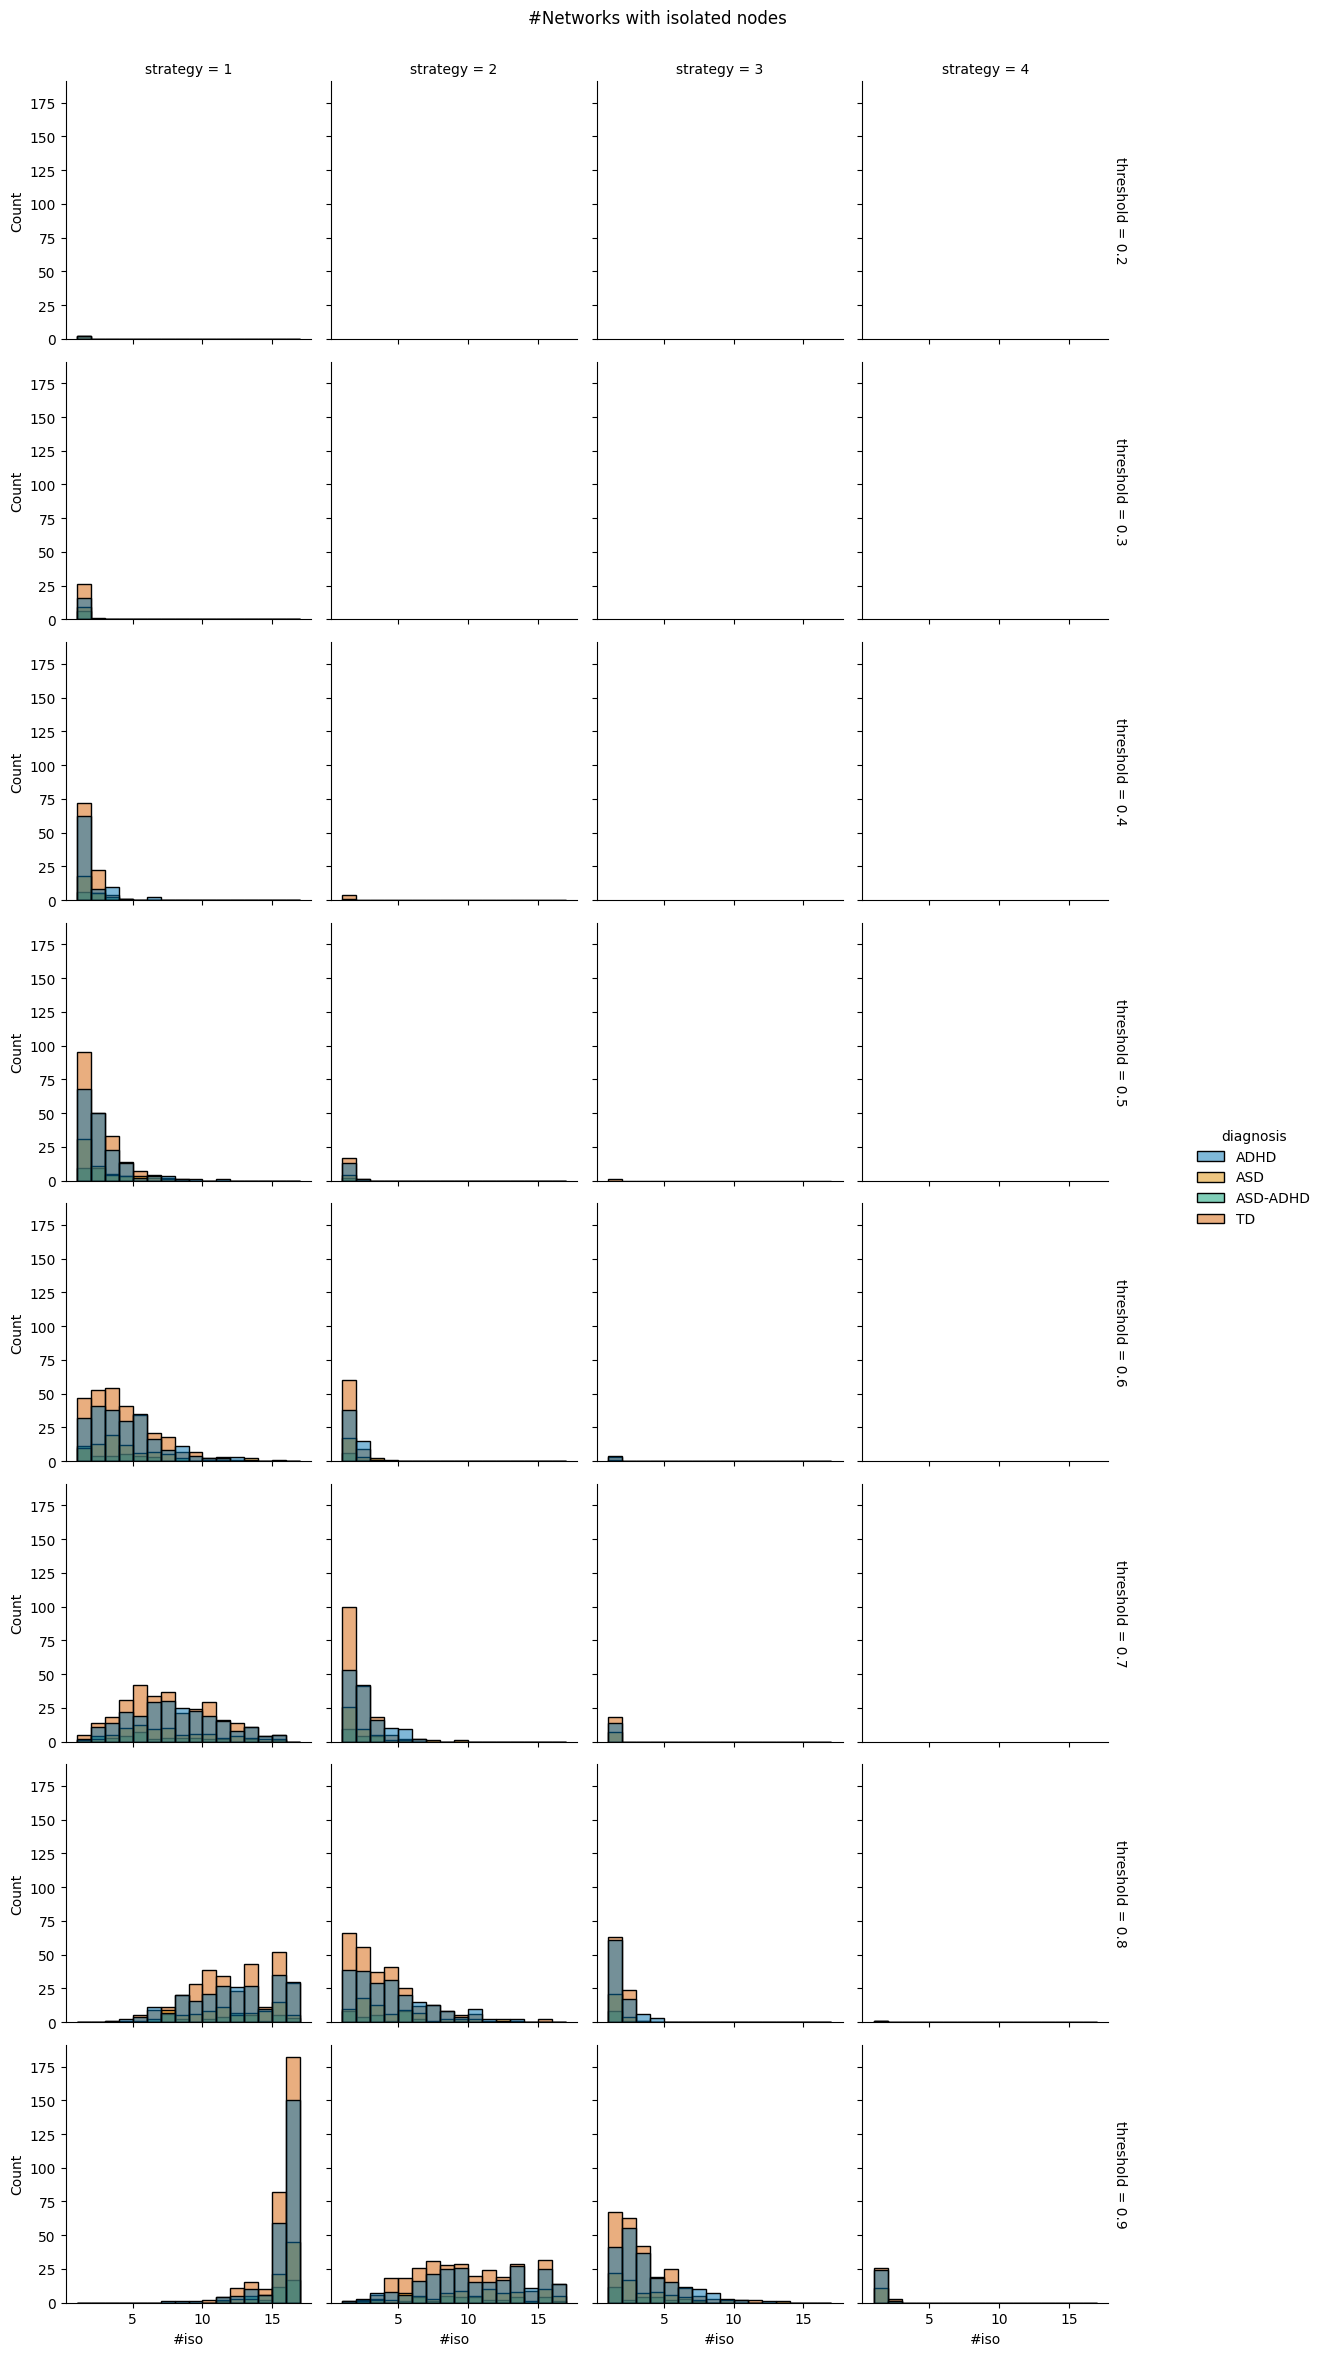

In [40]:
p = sns.displot(
    iso_data[['threshold', 'diagnosis','strategy', '#iso', 'absolute']][iso_data['#iso'] > 0], 
    x='#iso', 
    col="strategy", 
    row='threshold',
    palette = 'colorblind',
    hue_order = ['ADHD', 'ASD', 'ASD-ADHD', 'TD'],
    hue = 'diagnosis',
    #log_scale= (0, 10),
    binwidth=1,
    height=3, 
    facet_kws=dict(margin_titles=True),
)
p.fig.suptitle(f'#Networks with isolated nodes')
p.fig.subplots_adjust(top=0.95)

#fig = p.get_figure()
#fig.savefig("#Network count isolated nodes.png")

In [41]:
iso_data[(iso_data['strategy'] == '1') & (iso_data['threshold'] == 0.9)][['diagnosis', 
                                                                          '#iso', 
                                                                          'strategy']].count()

diagnosis    660
#iso         660
strategy     660
dtype: int64

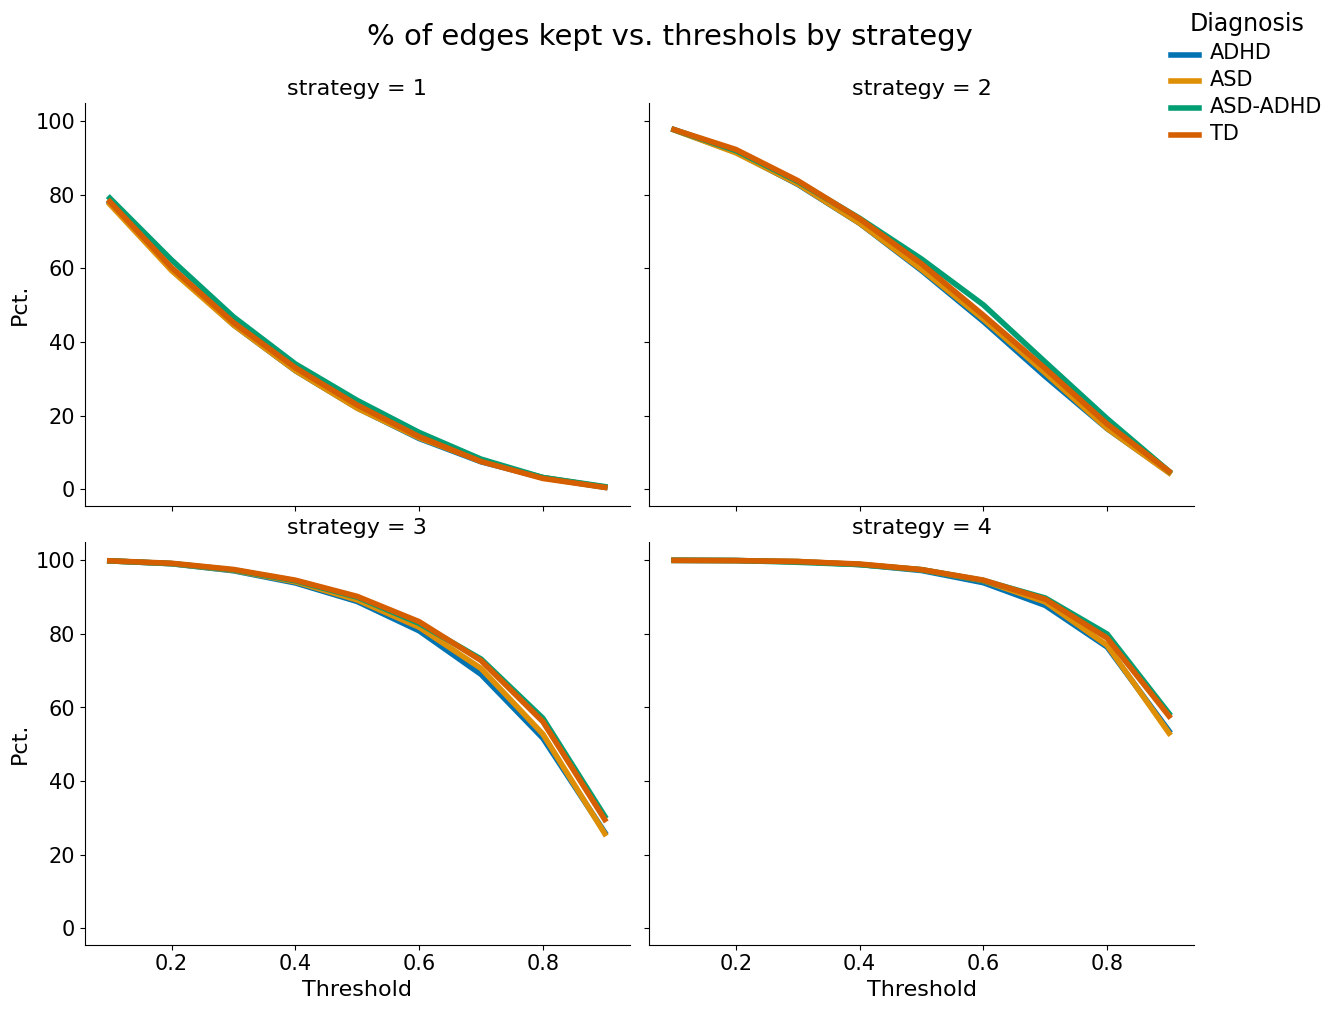

In [42]:
p = sns.relplot(
    data= iso_data[iso_data['strategy'].isin(['1', '2', '3', '4'])][['threshold', 'diagnosis',
          'strategy', "#pct_of_edges"]].groupby(['threshold', 
                                                 'diagnosis',
                                                 'strategy']).mean().reset_index(),
    x="threshold", 
    y="#pct_of_edges",
    hue="diagnosis", 
    col="strategy",
    kind="line", 
    height=5, 
    aspect=1.2, 
    palette = 'colorblind',
    hue_order = ['ADHD', 'ASD', 'ASD-ADHD', 'TD'],
    facet_kws=dict(sharex=True),
    linewidth=4,
    col_wrap = 2
)

#Legend
g._legend.set_title("Diagnosis", prop={'size': 16})
g._legend.set_loc("upper right")      # set location relative to that anchor
for text in g._legend.texts:
    text.set_fontsize(16)

# Increase tick label font size
for ax in p.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=16)
    ax.set_ylabel(ax.get_ylabel(), fontsize=16)
    ax.tick_params(axis='both', labelsize=15)
    ax.tick_params(axis='both', labelsize=15)
    ax.set_title(ax.get_title(), fontsize = 16)

p.axes[0].set_ylabel('Pct.')
p.axes[2].set_ylabel('Pct.')
p.axes[2].set_xlabel('Threshold')
p.axes[3].set_xlabel('Threshold')

#Legend
p._legend.set_title("Diagnosis", prop={'size': 17})
p._legend.set_loc("upper right")
for text in p._legend.texts:
    text.set_fontsize(15)

p.fig.suptitle(f'% of edges kept vs. threshols by strategy', fontsize = 21)
p.fig.subplots_adjust(top=0.90)

#plt.tight_layout()
plt.savefig("notebooks/pics/17 ROIs/gat_pct_edges_kept.svg", dpi = 300)
plt.show()

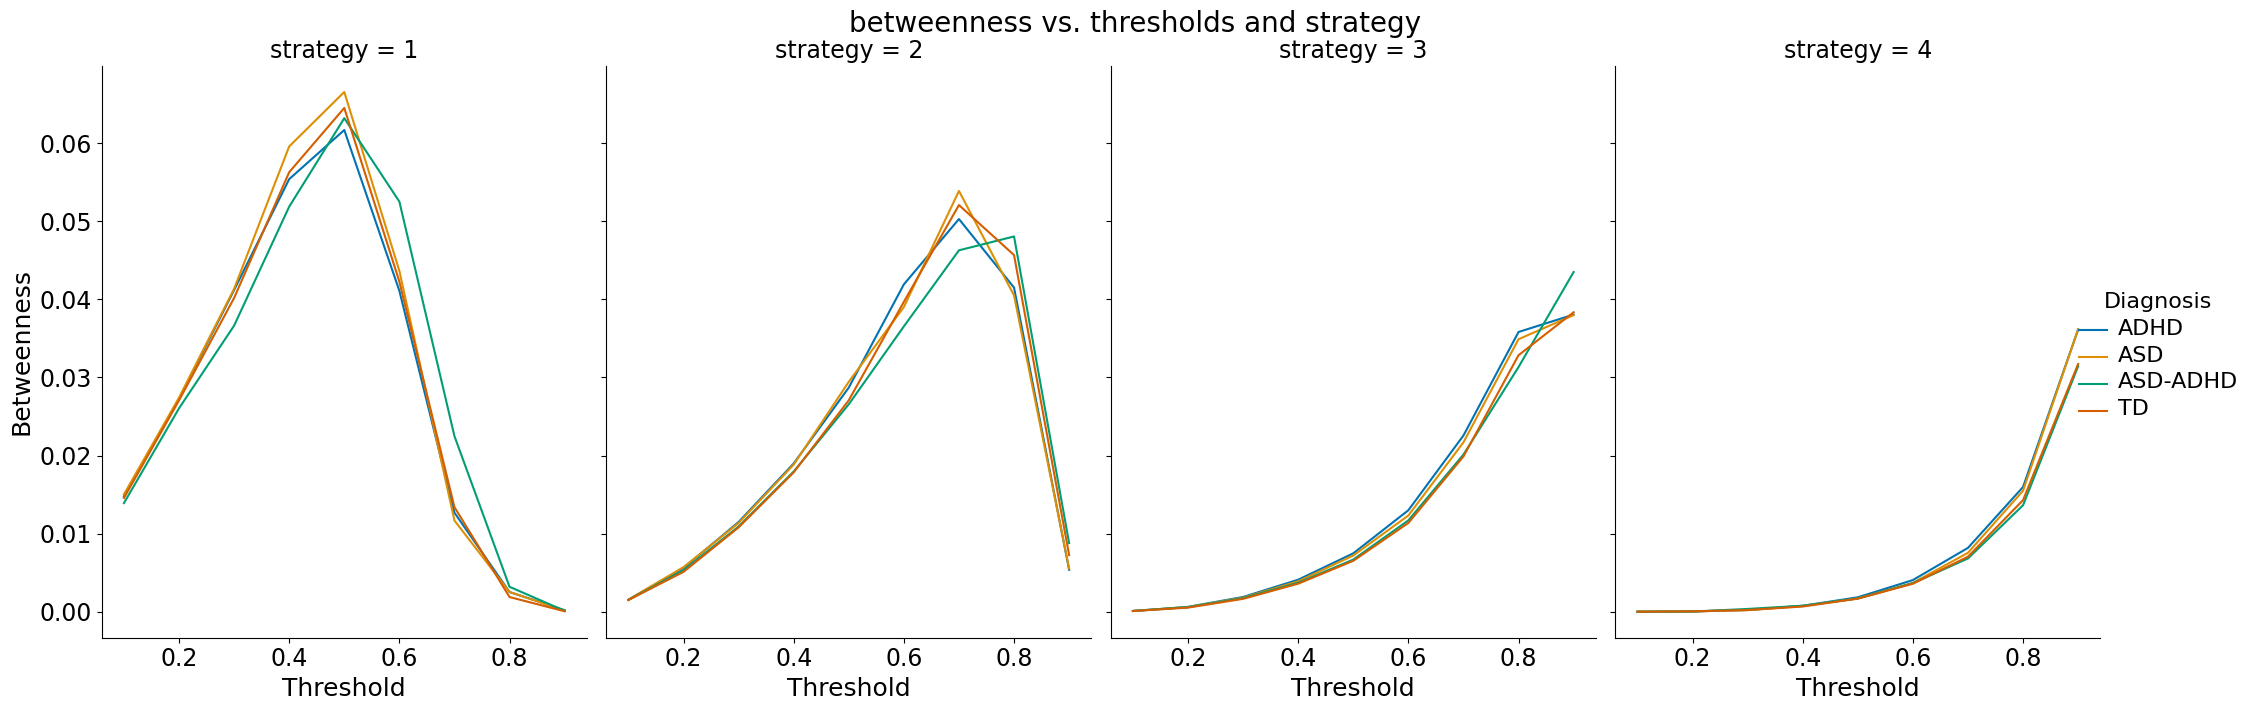

In [43]:
p = sns.relplot(
    data= bw_data[bw_data['strategy'].isin([1, 2, 3, 4])][['Threshold', 
                                                            'Diagnosis', 
                                                            'Betweenness',
                                                            'strategy']].groupby(['Threshold', 
                                                                                'Diagnosis',
                                                                                'strategy']).mean().reset_index(),
    x="Threshold", 
    y="Betweenness",
    hue="Diagnosis", 
    col="strategy",
    kind="line", 
    height=7, 
    aspect=.75, 
    palette = 'colorblind',
    hue_order = ['ADHD', 'ASD', 'ASD-ADHD', 'TD'],
    facet_kws=dict(sharex=True)
)

# Increase tick label font size
for ax in p.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=18)
    ax.set_ylabel(ax.get_ylabel(), fontsize=18)
    ax.tick_params(axis='both', labelsize=17)
    ax.tick_params(axis='both', labelsize=17)
    ax.set_title(ax.get_title(), fontsize = 17)

#Legend
p._legend.set_title("Diagnosis", prop={'size': 16})
g._legend.set_loc("upper right") 

for text in p._legend.texts:
    text.set_fontsize(16)


p.fig.suptitle(f'betweenness vs. thresholds and strategy', fontsize = 20)
p.fig.subplots_adjust(top=0.90)